In [2]:
import numpy as np
import awkward as ak
import uproot
import src.functions as fn
from pylab import cm
import matplotlib.pyplot as plt
import src.Network as net
import sys
import time
from mpl_toolkits.mplot3d import Axes3D

In [3]:
%matplotlib notebook

import mplhep as hep

# Make plots look more HEP-like
plt.style.use(hep.style.ROOT)

In [4]:
fileName="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E100Eta1p62Delta2_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225819/0000/ntuples.root"
fileNameDelta2p5="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E100Eta1p62Delta2p5_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225832/0000/ntuples.root"
fileNameDelta3="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E100Eta1p62Delta3_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225846/0000/ntuples.root"
fileNameDelta5="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E100Eta1p62Delta5_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225928/0000/ntuples.root"
fileNameE50Delta2="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E50Eta1p62Delta2_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225716/0000/ntuples.root"
fileNameE50Delta2p5="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E50Eta1p62Delta2p5_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225726/0000/ntuples.root"
fileNameE50Delta3="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E50Eta1p62Delta3_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225737/0000/ntuples.root"
fileNameE50Delta5="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E50Eta1p62Delta5_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225808/0000/ntuples.root"
fileNameE25Delta2="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E25Eta1p62Delta2_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225611/0000/ntuples.root"
fileNameE25Delta2p5="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E25Eta1p62Delta2p5_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225623/0000/ntuples.root"
fileNameE25Delta3="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E25Eta1p62Delta3_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225633/0000/ntuples.root"
fileNameE25Delta5="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E25Eta1p62Delta5_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225704/0000/ntuples.root"

fileE100Delta2=uproot.open(fileName)
fileE100Delta2p5=uproot.open(fileNameDelta2p5)
fileE100Delta3=uproot.open(fileNameDelta3)
fileE100Delta5=uproot.open(fileNameDelta5)

fileE50Delta2=uproot.open(fileNameE50Delta2)
fileE50Delta2p5=uproot.open(fileNameE50Delta2p5)
fileE50Delta3=uproot.open(fileNameE50Delta3)
fileE50Delta5=uproot.open(fileNameE50Delta5)

fileE25Delta2=uproot.open(fileNameE25Delta2)
fileE25Delta2p5=uproot.open(fileNameE25Delta2p5)
fileE25Delta3=uproot.open(fileNameE25Delta3)
fileE25Delta5=uproot.open(fileNameE25Delta5)

In [5]:
trackstersE100D2=fileE100Delta2["ana/tracksters"]
trackstersE100D2p5=fileE100Delta2p5["ana/tracksters"]
trackstersE100D3=fileE100Delta3["ana/tracksters"]
trackstersE100D5=fileE100Delta5["ana/tracksters"]

trackstersE50D2=fileE50Delta2["ana/tracksters"]
trackstersE50D5=fileE50Delta5["ana/tracksters"]
trackstersE50D2p5=fileE50Delta2p5["ana/tracksters"]
trackstersE50D3=fileE50Delta3["ana/tracksters"]

trackstersE25D2=fileE25Delta2["ana/tracksters"]
trackstersE25D5=fileE25Delta5["ana/tracksters"]
trackstersE25D2p5=fileE25Delta2p5["ana/tracksters"]
trackstersE25D3=fileE25Delta3["ana/tracksters"]

In [5]:
tracksters=file["ana/tracksters"]
vertices_E = tracksters['vertices_energy'].array()
vertices_indexes = tracksters['vertices_indexes'].array()
vertices_x = tracksters['vertices_x'].array()
vertices_y = tracksters['vertices_y'].array()
vertices_z = tracksters['vertices_z'].array()
vertices_layers=tracksters['vertices_layer'].array()
trackster_E=tracksters['raw_energy'].array()
trackster_phi=tracksters['trackster_barycenter_phi'].array()
trackster_eta=tracksters['trackster_barycenter_eta'].array()

trackstersE50D2=fileE50Delta2["ana/tracksters"]
verticesE50D2_E = trackstersE50D2['vertices_energy'].array()
verticesE50D2_indexes = trackstersE50D2['vertices_indexes'].array()
tracksterE50D2_E=trackstersE50D2['raw_energy'].array()
#vertices_x = tracksters['vertices_x'].array()
#vertices_y = tracksters['vertices_y'].array()
#vertices_z = tracksters['vertices_z'].array()
#vertices_layers=tracksters['vertices_layer'].array()

trackstersE50D5=fileE50Delta5["ana/tracksters"]
verticesE50D5_E = trackstersE50D5['vertices_energy'].array()
verticesE50D5_indexes = trackstersE50D5['vertices_indexes'].array()
tracksterE50D5_E=trackstersE50D5['raw_energy'].array()

trackstersD2p5=fileDelta2p5["ana/tracksters"]
verticesD2p5_E = trackstersD2p5['vertices_energy'].array()
verticesD2p5_indexes = trackstersD2p5['vertices_indexes'].array()
verticesD2p5_x = trackstersD2p5['vertices_x'].array()
verticesD2p5_y = trackstersD2p5['vertices_y'].array()
verticesD2p5_z = trackstersD2p5['vertices_z'].array()
verticesD2p5_layers=trackstersD2p5['vertices_layer'].array()
tracksterD2p5_E=trackstersD2p5['raw_energy'].array()
tracksterD2p5_EReg=trackstersD2p5['regressed_energy'].array()
tracksterD2p5_phi=trackstersD2p5['trackster_barycenter_phi'].array()
tracksterD2p5_eta=trackstersD2p5['trackster_barycenter_eta'].array()

trackstersD3=fileDelta3["ana/tracksters"]
verticesD3_E = trackstersD3['vertices_energy'].array()
verticesD3_indexes = trackstersD3['vertices_indexes'].array()
tracksterD3_E=trackstersD3['raw_energy'].array()

trackstersD5=fileDelta5["ana/tracksters"]
verticesD5_E = trackstersD5['vertices_energy'].array()
verticesD5_indexes = trackstersD5['vertices_indexes'].array()
verticesD5_x = trackstersD5['vertices_x'].array()
verticesD5_y = trackstersD5['vertices_y'].array()
verticesD5_z = trackstersD5['vertices_z'].array()
verticesD5_layers=trackstersD5['vertices_layer'].array()
tracksterD5_E=trackstersD5['raw_energy'].array()
tracksterD5_EReg=trackstersD5['regressed_energy'].array()
tracksterD5_phi=trackstersD5['trackster_barycenter_phi'].array()
tracksterD5_eta=trackstersD5['trackster_barycenter_eta'].array()


NameError: name 'file' is not defined

In [26]:
print(tracksters.keys())
print(ak.count(tracksters['recHits_y'].array(),axis=-1))
print(ak.count(tracksters['vertices_y'].array(),axis=-1))

['event', 'NClusters', 'NTracksters', 'time', 'timeError', 'regressed_energy', 'raw_energy', 'raw_em_energy', 'raw_pt', 'raw_em_pt', 'barycenter_x', 'barycenter_y', 'barycenter_z', 'trackster_barycenter_eta', 'trackster_barycenter_phi', 'EV1', 'EV2', 'EV3', 'eVector0_x', 'eVector0_y', 'eVector0_z', 'sigmaPCA1', 'sigmaPCA2', 'sigmaPCA3', 'id_probabilities', 'vertices_indexes', 'vertices_x', 'vertices_y', 'vertices_z', 'vertices_energy', 'vertices_correctedEnergy', 'vertices_correctedEnergyUncertainty', 'vertices_multiplicity', 'vertices_layer', 'recHits_indexes', 'recHits_x', 'recHits_y', 'recHits_z', 'recHits_energy', 'recHits_waferU', 'recHits_waferV', 'recHits_cellU', 'recHits_cellV', 'layer_cluster_seed']
[[602, 37], [666], [665], [63, 606], [678], ... [717], [732], [8, 748], [706], [683]]
[[20, 7], [28], [29], [4, 34], [29], [24, ... 17], [37], [40], [2, 39], [43], [26]]


In [ ]:
#%matplotlib inline
plt.figure(figsize=(7,5))
print(ak.count(trackster_E,axis=1))
plt.hist(ak.count(trackster_E,axis=1),bins=4,range=(0.5,4.5),histtype="step",label="E100_D2")
#plt.hist(ak.count(tracksterD2p5_E,axis=1),bins=6,range=(0.5,6.5),histtype="step",label="2p5")
#plt.hist(ak.count(tracksterD3_E,axis=1),bins=4,range=(1.5,5.5),histtype="step",label="3")
plt.hist(ak.count(tracksterD5_E,axis=1),bins=4,range=(0.5,4.5),histtype="step",label="E100_D5")
plt.hist(ak.count(tracksterE50D5_E,axis=1),bins=4,range=(0.5,4.5),histtype="step",label="E50_D5")
plt.hist(ak.count(tracksterE50D2_E,axis=1),bins=4,range=(0.5,4.5),histtype="step",label="E50_D2")
plt.legend()
plt.show()

In [ ]:
#%matplotlib inline
plt.figure(figsize=(7,5))
plt.hist(ak.flatten(trackster_E),bins=100,range=(0,200),histtype="step",label="E100D2")
plt.hist(ak.flatten(tracksterD5_E),bins=100,range=(0,200),histtype="step",label="E100D5")
plt.hist(ak.flatten(tracksterE50D2_E),bins=100,range=(0,200),histtype="step",label="E50D2")
plt.hist(ak.flatten(tracksterE50D5_E),bins=100,range=(0,200),histtype="step",label="E50D5")
#plt.hist(ak.flatten(tracksterD3_E),bins=50,histtype="step",label="3")
#plt.hist(ak.flatten(tracksterD2p5_E),bins=50,histtype="step",label="2p5")
print(len(ak.flatten(trackster_E)))
print(len(ak.flatten(tracksterD5_E)))
print(len(ak.flatten(tracksterE50D2_E)))
print(len(ak.flatten(tracksterE50D5_E)))
plt.legend()
plt.show()

In [ ]:
#%matplotlib inline
plt.figure(figsize=(7,5))
print(ak.flatten(ak.count(vertices_indexes,axis=2)))
print(len(vertices_indexes))
print(len(verticesD5_indexes))
plt.hist(ak.flatten(ak.count(vertices_indexes,axis=2)),bins=20,range=(0,50),histtype="step",label="E100D2")
plt.hist(ak.flatten(ak.count(verticesD5_indexes,axis=2)),bins=20,range=(0,50),histtype="step",label="E100D5")
plt.hist(ak.flatten(ak.count(verticesE50D2_indexes,axis=2)),bins=20,range=(0,50),histtype="step",label="E50D2")
plt.hist(ak.flatten(ak.count(verticesE50D5_indexes,axis=2)),bins=20,range=(0,50),histtype="step",label="E50D5")
#plt.hist(ak.flatten(ak.count(verticesD3_indexes,axis=2)),bins=20,range=(0,50),histtype="step",label="3")
#plt.hist(ak.flatten(ak.count(verticesD2p5_indexes,axis=2)),bins=20,range=(0,50),histtype="step",label="2p5")
plt.legend()
plt.show()

In [ ]:
#%matplotlib inline
plt.figure(figsize=(7,5))
print(ak.flatten(ak.count(vertices_indexes,axis=2)))
print(len(vertices_indexes))
print(len(verticesD5_indexes))
plt.hist(ak.flatten(ak.count(vertices_indexes,axis=2))/ak.flatten(trackster_E),bins=50,range=(0,1),histtype="step",label="E100D2")
plt.hist(ak.flatten(ak.count(verticesD5_indexes,axis=2))/ak.flatten(tracksterD5_E),bins=50,range=(0,1),histtype="step",label="E100D5")
plt.hist(ak.flatten(ak.count(verticesE50D2_indexes,axis=2))/ak.flatten(tracksterE50D2_E),bins=50,range=(0,1),histtype="step",label="E50D2")
plt.hist(ak.flatten(ak.count(verticesE50D5_indexes,axis=2))/ak.flatten(tracksterE50D5_E),bins=50,range=(0,1),histtype="step",label="E50D5")
#plt.hist(ak.flatten(ak.count(verticesD3_indexes,axis=2)),bins=20,range=(0,50),histtype="step",label="3")
#plt.hist(ak.flatten(ak.count(verticesD2p5_indexes,axis=2)),bins=20,range=(0,50),histtype="step",label="2p5")
plt.legend()
plt.show()

In [ ]:
#%matplotlib inline
plt.figure(figsize=(7,5))
print(ak.flatten(ak.count(vertices_indexes,axis=2)))
print(len(vertices_indexes))
print(len(verticesD5_indexes))
plt.hist(ak.flatten(ak.count(vertices_indexes,axis=2)),bins=20,range=(0,50),histtype="step",label="E100D2")
plt.hist(ak.flatten(ak.count(verticesD5_indexes,axis=2)),bins=20,range=(0,50),histtype="step",label="E100D5")
plt.hist(ak.flatten(ak.count(verticesE50D2_indexes,axis=2)),bins=20,range=(0,50),histtype="step",label="E50D2")
plt.hist(ak.flatten(ak.count(verticesE50D5_indexes,axis=2)),bins=20,range=(0,50),histtype="step",label="E50D5")
#plt.hist(ak.flatten(ak.count(verticesD3_indexes,axis=2)),bins=20,range=(0,50),histtype="step",label="3")
#plt.hist(ak.flatten(ak.count(verticesD2p5_indexes,axis=2)),bins=20,range=(0,50),histtype="step",label="2p5")
plt.legend()
plt.show()

In [ ]:
def plotEvent(fig,ax,tracksters,nEvent):
    indexes = tracksters['vertices_indexes'].array()[nEvent]
    x = tracksters['vertices_x'].array()[nEvent]
    y = tracksters['vertices_y'].array()[nEvent]
    z = tracksters['vertices_z'].array()[nEvent]
    E = tracksters['vertices_energy'].array()[nEvent]
    NTracks=len(x)
    #print(NTracks)
    ax.set_xlabel('X (cm)')
    ax.set_ylabel('Y (cm)')
    ax.set_zlabel('Z (cm)')
    colmap = cm.ScalarMappable(cmap=cm.viridis)
    
    for i in range(NTracks):
        yg =ax.scatter(x[i], y[i], z[i], marker='o') 
    
    
    plt.show()

In [ ]:
%matplotlib notebook
plt.style.use("default")
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

plotEvent(fig,ax,tracksters,7)

In [ ]:
print(trackster_E[17])

In [ ]:
mask2=ak.any(E150t30mask,axis=1)
xMasked=vertices_x[mask2]
yMasked=vertices_y[mask2]
zMasked=vertices_z[mask2]
eMasked=vertices_E[mask2]
#print(ak.any(E150t30mask,axis=1))
print(len(xMasked))

In [ ]:
def plotOddEvent(fig,ax,xMasked,yMasked,zMasked,nEvent):
    #indexes = tracksters['vertices_indexes'].array()[nEvent]
    x = xMasked[nEvent]
    y = yMasked[nEvent]
    z = zMasked[nEvent]
    #E = tracksters['vertices_energy'].array()[nEvent]
    NTracks=len(x)
    #print(NTracks)
    ax.set_xlabel('X (cm)')
    ax.set_ylabel('Y (cm)')
    ax.set_zlabel('Z (cm)')
    colmap = cm.ScalarMappable(cmap=cm.viridis)
    
    for i in range(NTracks):
        yg =ax.scatter(x[i], y[i], z[i], marker='o') 
    
    
    plt.show()

In [ ]:
%matplotlib notebook
plt.style.use("default")
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
plotOddEvent(fig,ax,xMasked,yMasked,zMasked,20)

In [ ]:

plt.figure(figsize=(7,5))
plt.hist(ak.flatten(ak.count(xMasked,axis=1)),bins=10)
plt.show()

In [ ]:
print(len(ak.count(xMasked,axis=-2)))

In [ ]:
print(ak.count(xMasked,axis=-1))

In [ ]:
print(ak.count(ak.sum(eMasked,axis=-1),axis=1))

In [ ]:

plt.figure(figsize=(7,5))
plt.hist(ak.count(ak.sum(eMasked,axis=-1),axis=1),bins=10)
plt.show()

In [ ]:
hackFileName="/eos/user/b/bmaier/ticl_ml_hackathon/samples/landingzone/two_closeby_photons_pu0/ntuples_13801550_555.root"
hackFile=uproot.open(hackFileName)

In [ ]:
hackTrackster=hackFile['ticlNtuplizer/tracksters']
hackTrackster.keys()

In [ ]:
hackBarycenter_x=hackTrackster['barycenter_x'].array()
hackBarycenter_y=hackTrackster['barycenter_y'].array()

print(hackBarycenter_x)
hackBarycenter_R=np.sqrt(hackBarycenter_y**2+hackBarycenter_x**2)
print(ak.count(hackBarycenter_R,axis=-1))
plt.figure(figsize=(7,5))
plt.hist(ak.count(hackBarycenter_R,axis=-1))

In [ ]:
ak.sum(np.abs(hackBarycenter_R[:,0]-hackBarycenter_R) < 2.5,axis=1)

In [ ]:
plt.figure(figsize=(7,5))
plt.hist(ak.flatten(np.abs(hackBarycenter_R[:,0]-hackBarycenter_R)),bins=20)

In [ ]:
ak.count(hackBarycenter_R)

In [ ]:
mask=ak.all(np.abs(hackBarycenter_R[:,0]-hackBarycenter_R)<2,axis=1)
print(ak.sum(mask))

In [ ]:
hackMasked_x=hackTrackster['vertices_x'].array()[mask]
hackMasked_y=hackTrackster['vertices_y'].array()[mask]
hackMasked_z=hackTrackster['vertices_z'].array()[mask]

In [ ]:
print(hackMasked_x[0,])

In [ ]:
def plotOddHackEvent(fig,ax,xMasked,yMasked,zMasked,nEvent):
    #indexes = tracksters['vertices_indexes'].array()[nEvent]
    x = xMasked[nEvent]
    y = yMasked[nEvent]
    z = zMasked[nEvent]
    #E = tracksters['vertices_energy'].array()[nEvent]
    NTracks=len(x)
    #print(NTracks)
    ax.set_xlabel('X (cm)')
    ax.set_ylabel('Y (cm)')
    ax.set_zlabel('Z (cm)')
    colmap = cm.ScalarMappable(cmap=cm.viridis)
    
    for i in range(NTracks):
        yg =ax.scatter(x[i], y[i], z[i], marker='o') 
    
    
    plt.show()

In [ ]:
print(len(hackMasked_x))

In [ ]:
%matplotlib notebook
plt.style.use("default")
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
n=6
plotOddEvent(fig,ax,hackMasked_x,hackMasked_y,hackMasked_z,n)
print(hackBarycenter_R[mask][n])

In [ ]:
hackBarycenter_R=np.sqrt((hackBarycenter_y[:,0]-hackBarycenter_y)**2+(hackBarycenter_x-hackBarycenter_x)**2)

In [ ]:
mask2=ak.any((hackBarycenter_R <2.5) & (hackBarycenter_R >0),axis=1)

In [ ]:
hackMasked2_x=hackTrackster['vertices_x'].array()[mask2]
hackMasked2_y=hackTrackster['vertices_y'].array()[mask2]
hackMasked2_z=hackTrackster['vertices_z'].array()[mask2]

In [ ]:
%matplotlib notebook
plt.style.use("default")
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
n=7
plotOddEvent(fig,ax,hackMasked2_x,hackMasked2_y,hackMasked2_z,n)
print(hackBarycenter_R[mask2][n])

In [14]:
def plotEvent(tracksters,nEvent,heatmap="energy"):
    indexes = tracksters['vertices_indexes'].array()[nEvent]
    x = tracksters['vertices_x'].array()[nEvent]
    y = tracksters['vertices_y'].array()[nEvent]
    z = tracksters['vertices_z'].array()[nEvent]
    E = tracksters['vertices_energy'].array()[nEvent]
    NTracks=len(x)
    print(f"Event={nEvent}")
    print(f"Raw_Energy={ak.sum(E,axis=1)}")
    reg_energy=tracksters["regressed_energy"].array()[nEvent]
    print(f"Regressed_Energy={reg_energy}")
    print(f"Number of nodes={ak.count(indexes,axis=1)}")
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(NTracks):
        
        edges_1 = fn.edgeBuilderNew(indexes[i],x[i],y[i],z[i],E[i])
        edges_1 = ak.flatten(edges_1[ak.num(edges_1) > 0].to_list())
        if(heatmap=="centrality"):
            heatmapVals=fn.nXCentralityPageRank(indexes[i],edges_1,True)
        elif(heatmap=="energy"):
            heatmapVals=E[i]
        yg =ax.scatter(x[i], y[i], z[i], marker='o') 
        ax.set_xlabel('X (cm)')
        ax.set_ylabel('Y (cm)')
        ax.set_zlabel('Z (cm)')
        colmap = cm.ScalarMappable(cmap=cm.viridis)
        if len(heatmapVals) > 0 :
            colmap.set_array(heatmapVals)
            yg = ax.scatter(x[i], y[i], z[i], c=cm.viridis(heatmapVals/max(heatmapVals)), marker='o', linewidth=2)
            cb = fig.colorbar(colmap,label=heatmap)
        else:
            yg =ax.scatter(x, y, z, marker='o') 

        if len(heatmap) > 0:
            
            for ind in edges_1:
                idx0 = ak.where(indexes[i] == ind.to_list()[0])[0][0]
                idx1 = ak.where(indexes[i] == ind.to_list()[1])[0][0]
                ax.plot(
                    [x[i][idx0] ,x[i][idx1]],
                    [y[i][idx0] ,y[i][idx1]],
                    [z[i][idx0] ,z[i][idx1]],
                    'black'
                )
        Eta=tracksters['trackster_barycenter_eta'].array()[nEvent][i]
        Phi=tracksters['trackster_barycenter_phi'].array()[nEvent][i]
        
        ax.scatter(tracksters['barycenter_x'].array()[nEvent][i],
                tracksters['barycenter_y'].array()[nEvent][i],
                tracksters['barycenter_z'].array()[nEvent][i],
               'black')
    plt.savefig("/eos/user/d/dmagdali/figures/"+f"MergeE100D2p5_Event{nEvent}_E63.5_E120_3dplot.png")
    #plt.show()


Event=340
Raw_Energy=[63.5, 120]
Regressed_Energy=[62.5, 138]
Number of nodes=[8, 20]


<IPython.core.display.Javascript object>


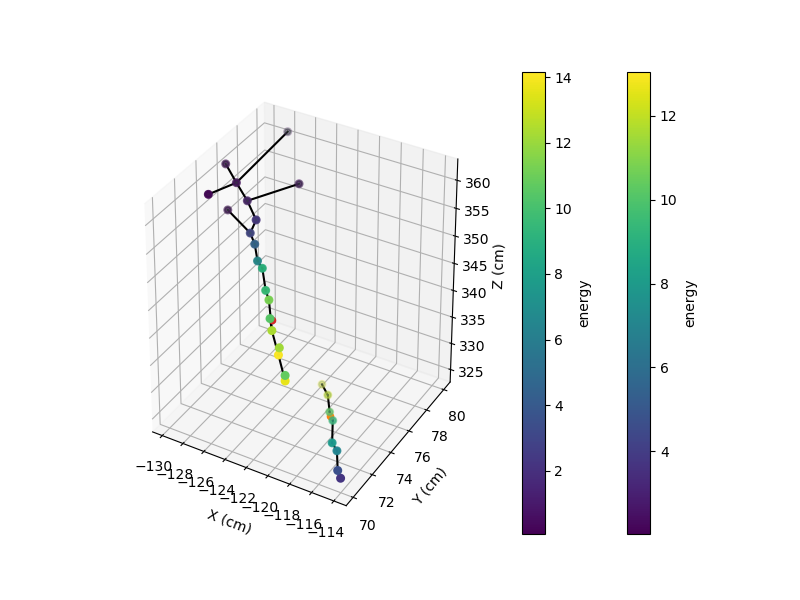

In [15]:
%matplotlib notebook
plt.style.use("default")
plotEvent(trackstersE100D2p5,340,"energy")

Event=5
Raw_Energy=[90.2, 94.6]
Regressed_Energy=[99.3, 106]
Number of nodes=[24, 28]


<IPython.core.display.Javascript object>


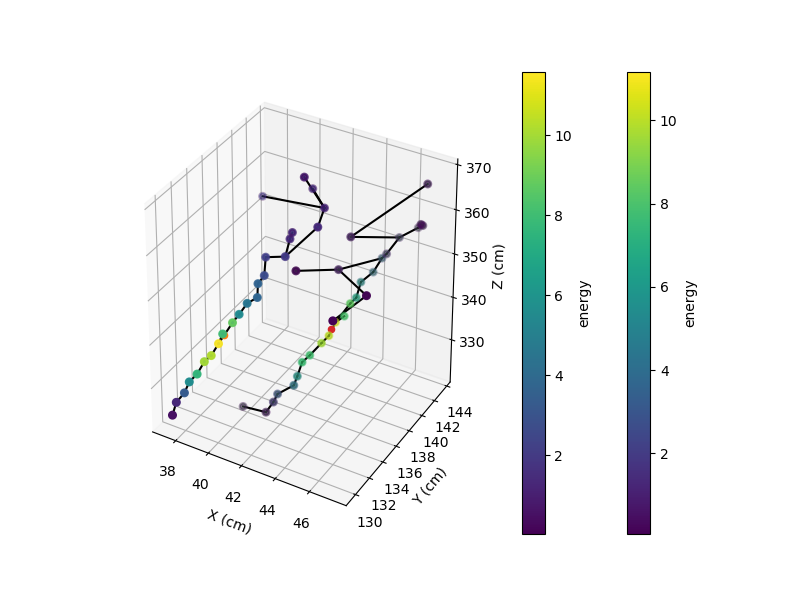

In [7]:
%matplotlib notebook
plt.style.use("default")
i=5

plotEvent(trackstersE100D5,i)

Event=200
Raw_Energy=[90.5, 95.4, 1.03]
Regressed_Energy=[98.3, 113, 5.16]
Number of nodes=[20, 26, 5]


<IPython.core.display.Javascript object>


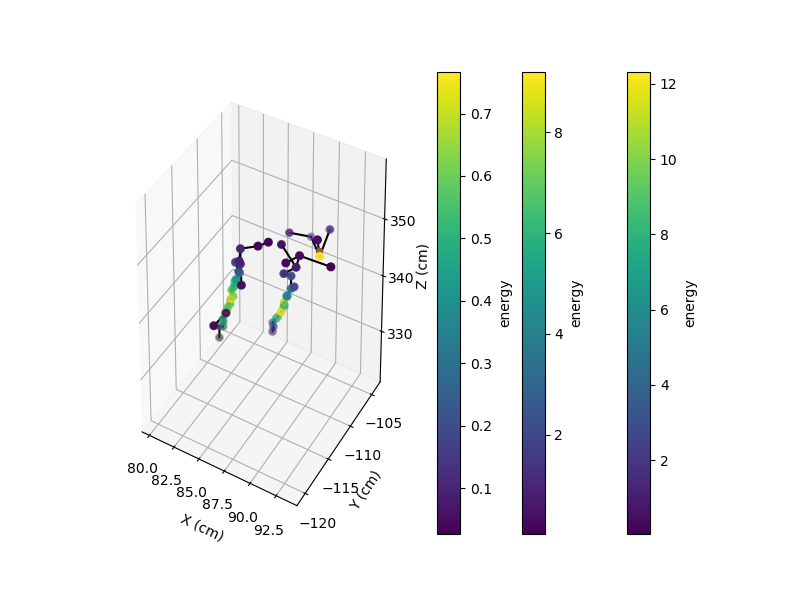

Event=323
Raw_Energy=[90.8, 91.5]
Regressed_Energy=[97.9, 101]
Number of nodes=[22, 22]


<IPython.core.display.Javascript object>


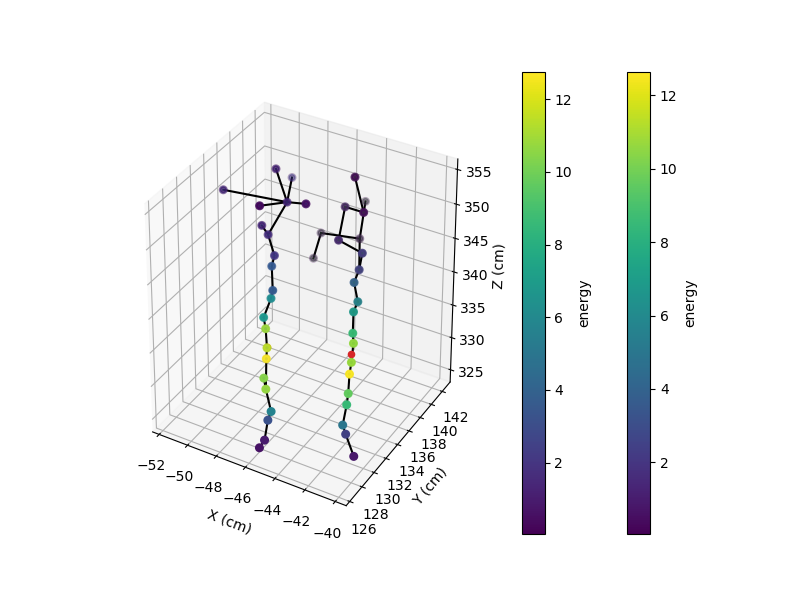

Event=295
Raw_Energy=[90.3, 95.2]
Regressed_Energy=[104, 108]
Number of nodes=[24, 33]


<IPython.core.display.Javascript object>


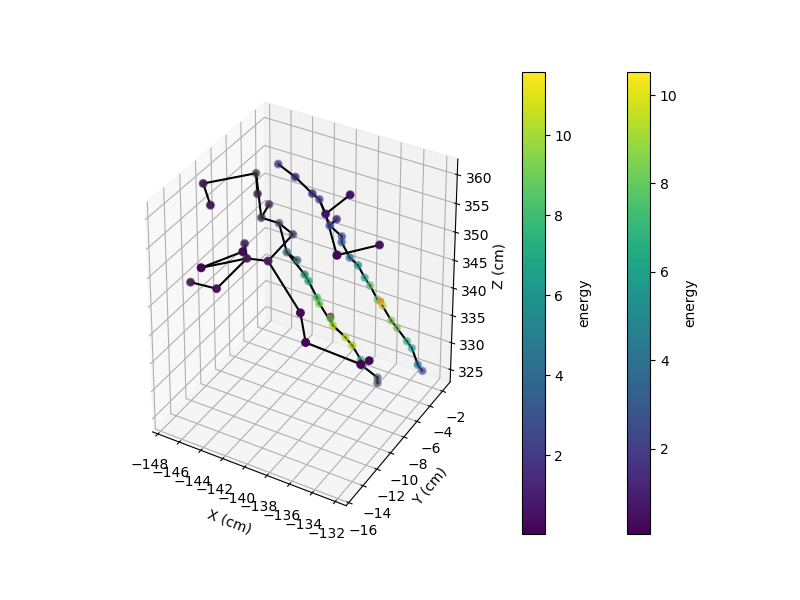

Event=189
Raw_Energy=[92.1, 92.2, 0.639]
Regressed_Energy=[104, 96.8, 0]
Number of nodes=[24, 18, 2]


<IPython.core.display.Javascript object>


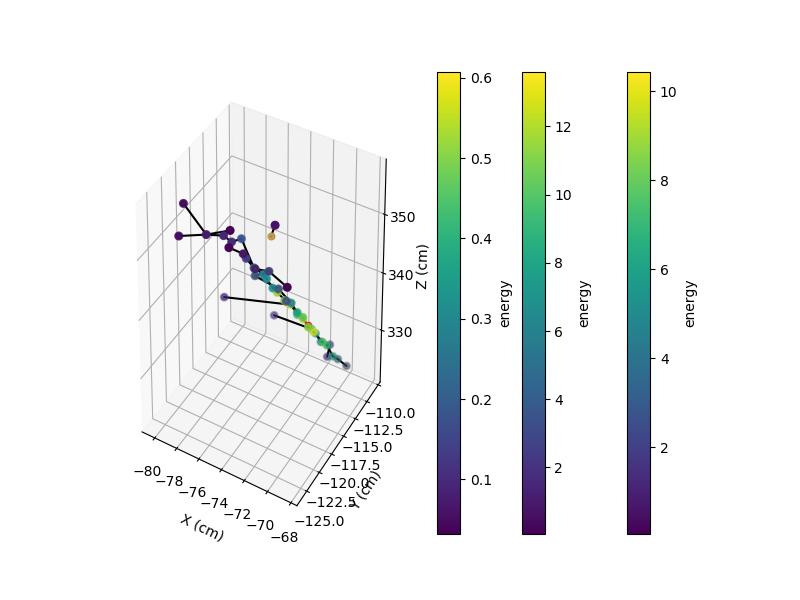

Event=105
Raw_Energy=[92.7, 95.1, 1.92]
Regressed_Energy=[101, 116, 1.95]
Number of nodes=[28, 35, 11]


<IPython.core.display.Javascript object>


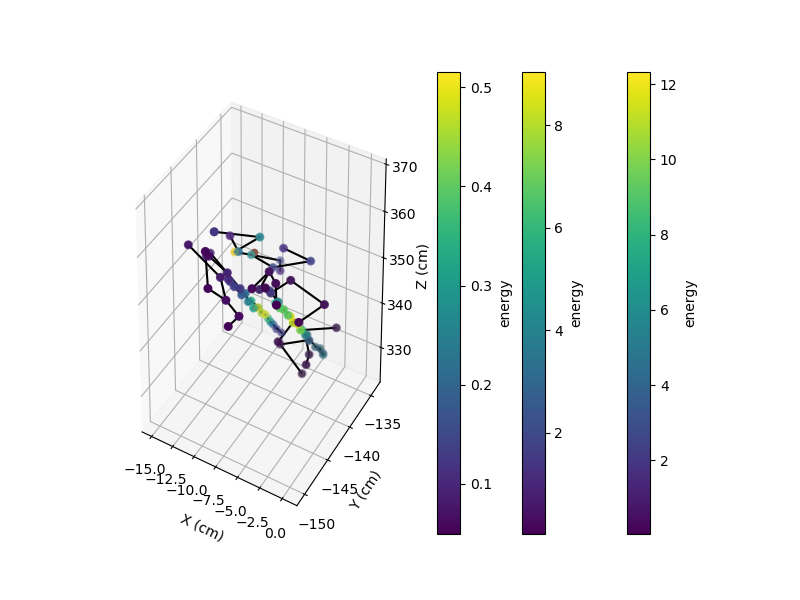

In [8]:
N=5
randomEvents=np.random.randint(0,450,N)

%matplotlib notebook
plt.style.use("default")

for i in randomEvents:
    
    plotEvent(trackstersE100D5,i)


Event=397
Energy=[96.7]
Number of nodes=[29]


<IPython.core.display.Javascript object>


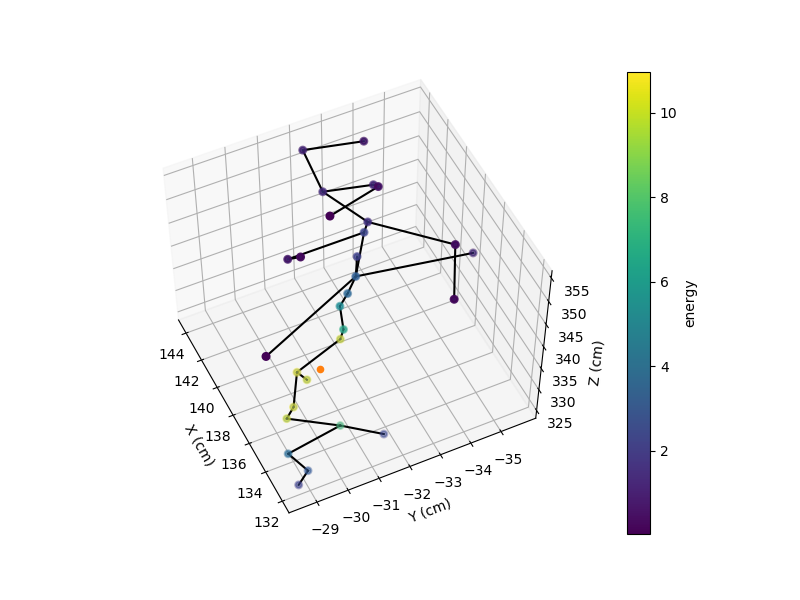

Event=25
Energy=[93.3]
Number of nodes=[28]


<IPython.core.display.Javascript object>


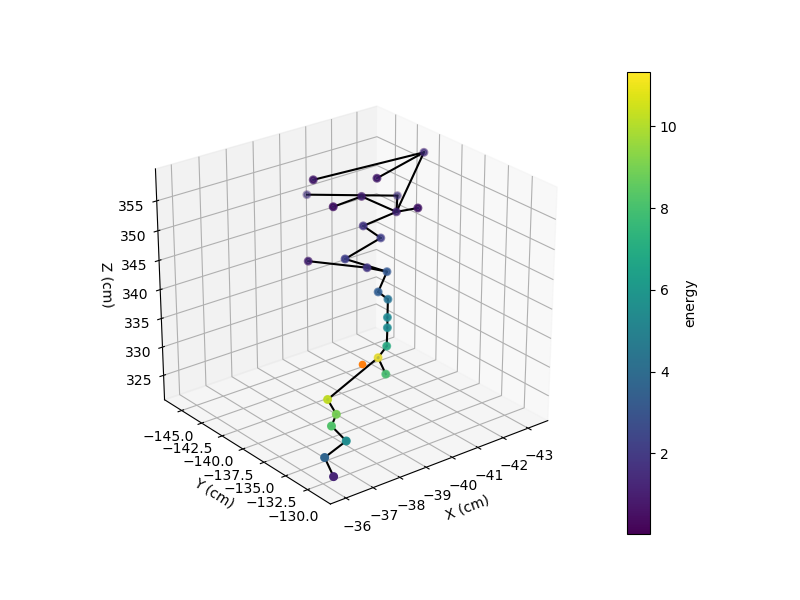

Event=375
Energy=[92.1]
Number of nodes=[27]


<IPython.core.display.Javascript object>


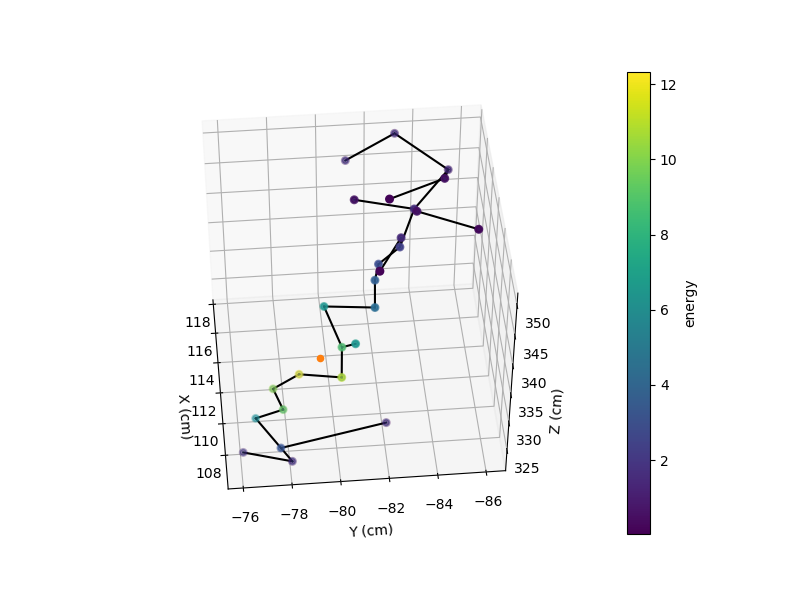

Event=406
Energy=[88.2]
Number of nodes=[33]


<IPython.core.display.Javascript object>


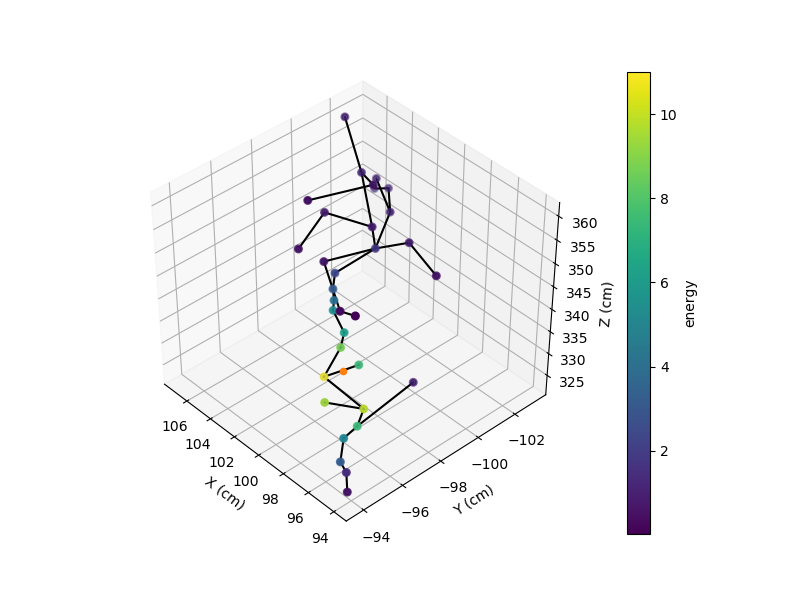

Event=15
Energy=[87.7]
Number of nodes=[28]


<IPython.core.display.Javascript object>


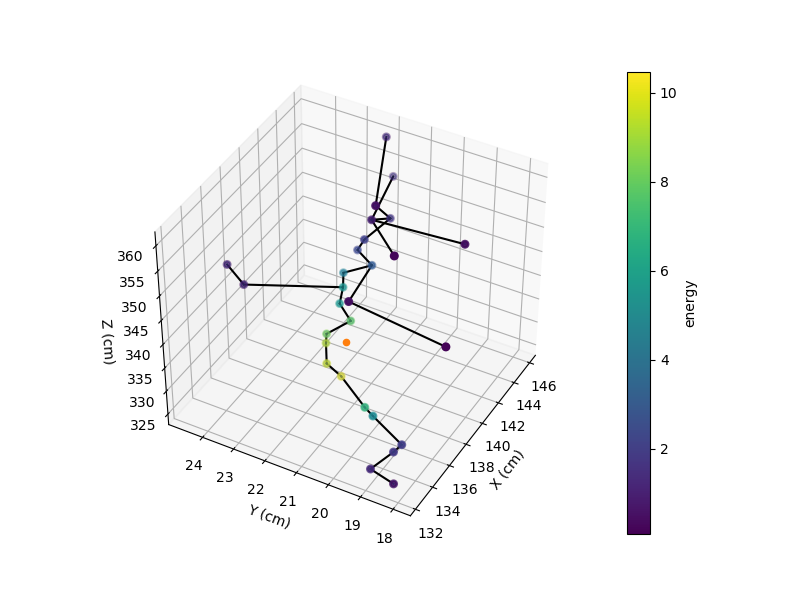

In [18]:
N=5
randomEvents=np.random.randint(0,450,N)

%matplotlib notebook
plt.style.use("default")

for i in randomEvents:
    #fig = plt.figure(figsize=(8,6))
    #ax = fig.add_subplot(111, projection='3d')
    plotEvent(trackstersE50D2,i,"energy")


Event=395
Energy=[36, 58.1]
Number of nodes=[15, 19]


<IPython.core.display.Javascript object>


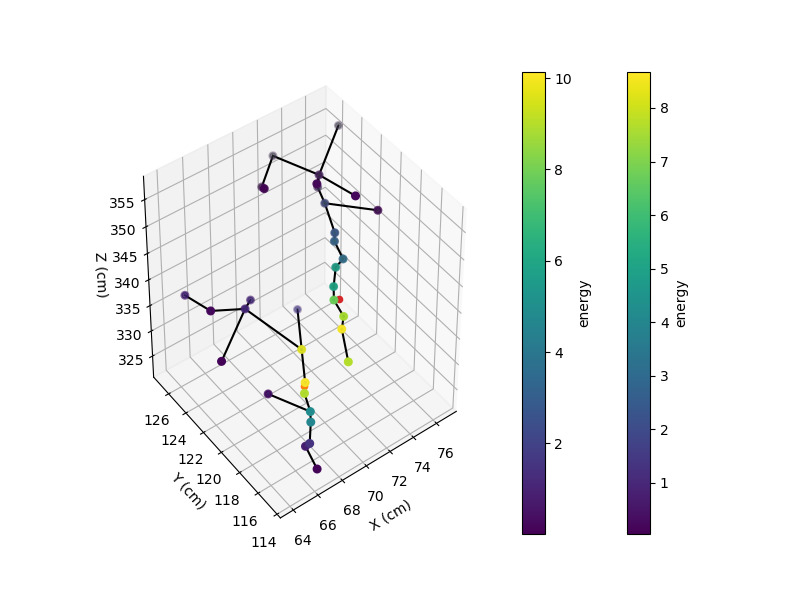

Event=341
Energy=[25, 62.5, 2.58]
Number of nodes=[4, 15, 14]


<IPython.core.display.Javascript object>


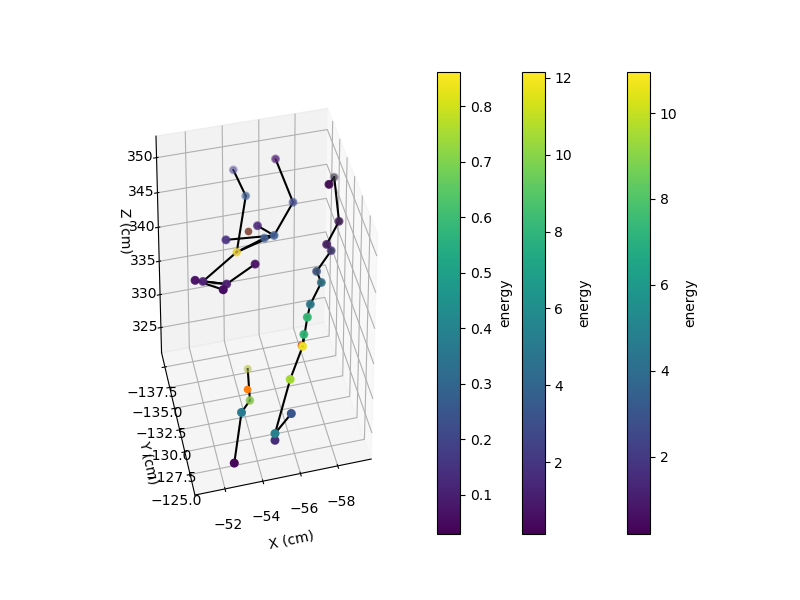

Event=173
Energy=[32.9, 54.5, 5.36]
Number of nodes=[9, 11, 10]


<IPython.core.display.Javascript object>


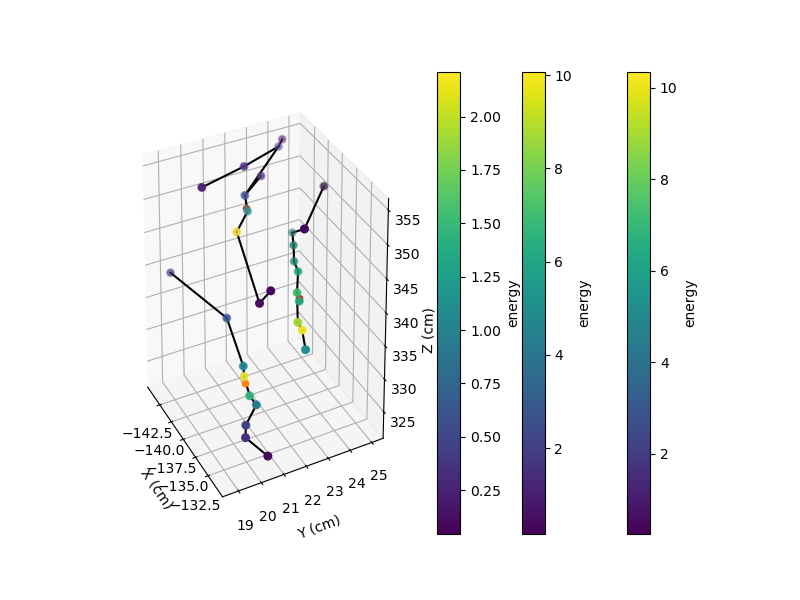

Event=89
Energy=[56.5, 37.1]
Number of nodes=[11, 19]


<IPython.core.display.Javascript object>


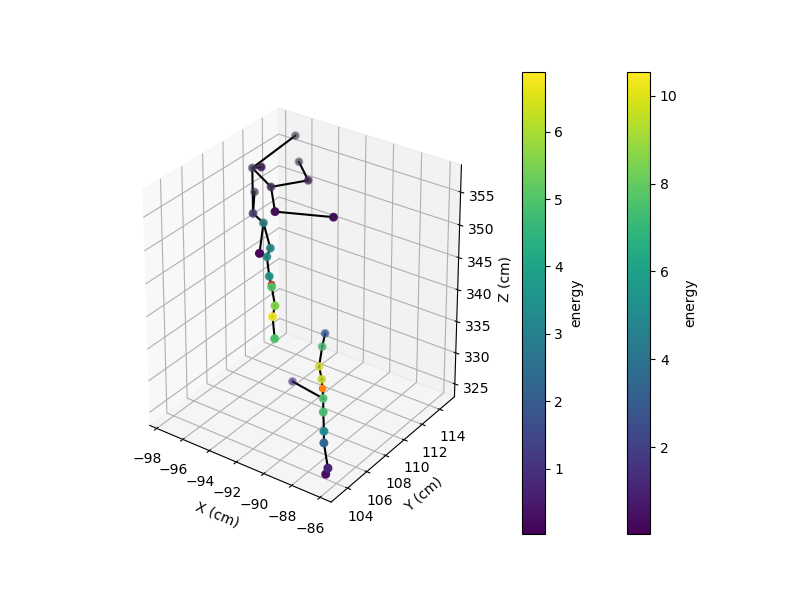

Event=18
Energy=[48.9, 39.4]
Number of nodes=[9, 30]


<IPython.core.display.Javascript object>


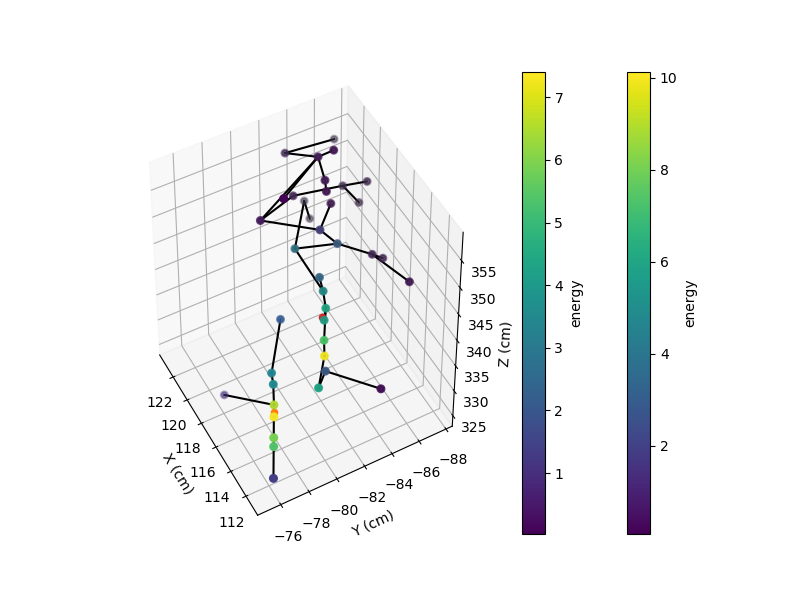

In [19]:
N=5
randomEvents=np.random.randint(0,450,N)

%matplotlib notebook
plt.style.use("default")

for i in randomEvents:
    #fig = plt.figure(figsize=(8,6))
    #ax = fig.add_subplot(111, projection='3d')
    plotEvent(trackstersE50D2p5,i,"energy")


In [1]:
N=5
randomEvents=np.random.randint(0,450,N)

%matplotlib notebook
plt.style.use("default")

for i in randomEvents:
    #fig = plt.figure(figsize=(8,6))
    #ax = fig.add_subplot(111, projection='3d')
plotEvent(trackstersE100D2p5,i,"energy")


IndentationError: expected an indented block (<ipython-input-1-e69a20991334>, line 10)

Event=79
Raw_Energy=[77.6, 106]
Regressed_Energy=[82.4, 125]
Number of nodes=[12, 35]


<IPython.core.display.Javascript object>


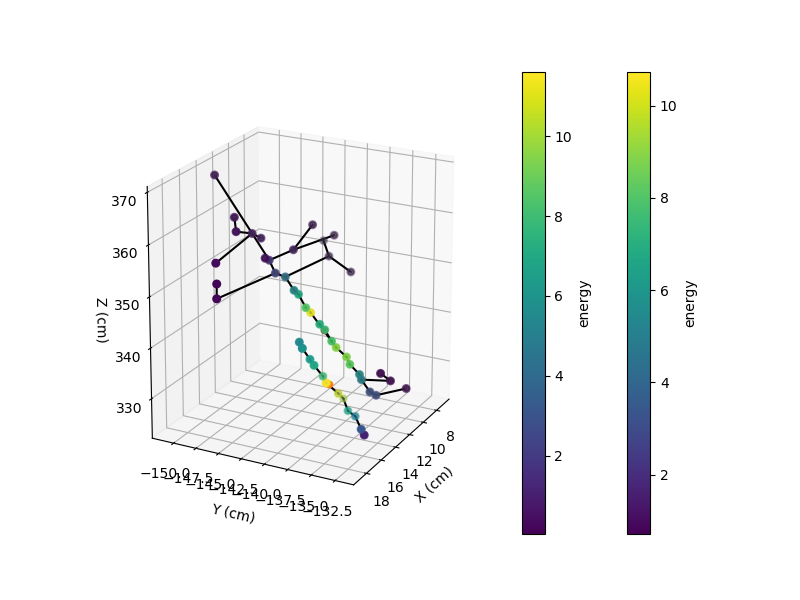

Event=360
Raw_Energy=[72.6, 1.74, 108]
Regressed_Energy=[71.6, 6.61, 130]
Number of nodes=[11, 8, 30]


<IPython.core.display.Javascript object>


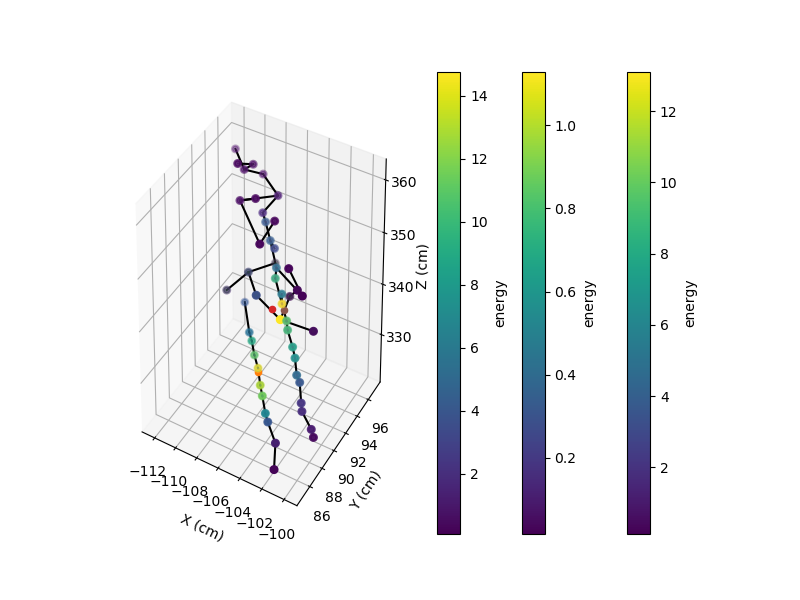

Event=61
Raw_Energy=[75.4, 104]
Regressed_Energy=[76.2, 130]
Number of nodes=[13, 17]


<IPython.core.display.Javascript object>


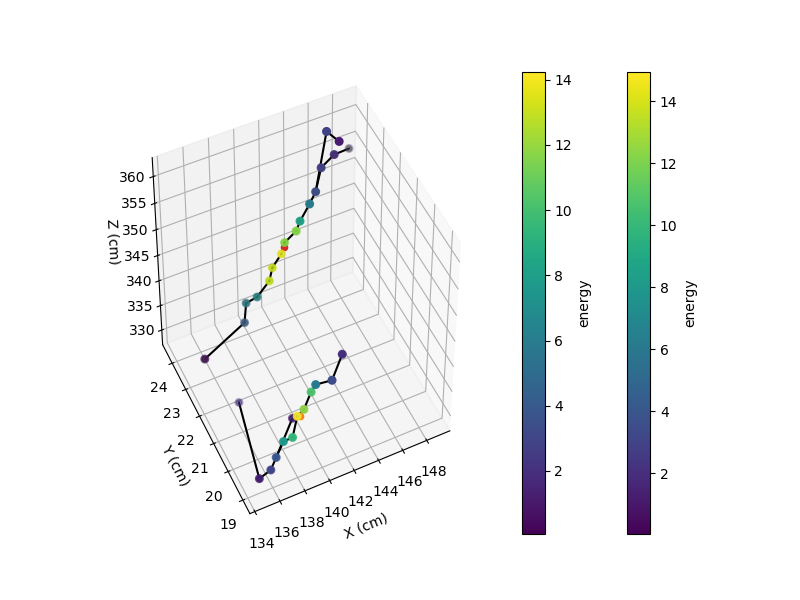

Event=315
Raw_Energy=[77.5, 108]
Regressed_Energy=[80, 111]
Number of nodes=[17, 27]


<IPython.core.display.Javascript object>


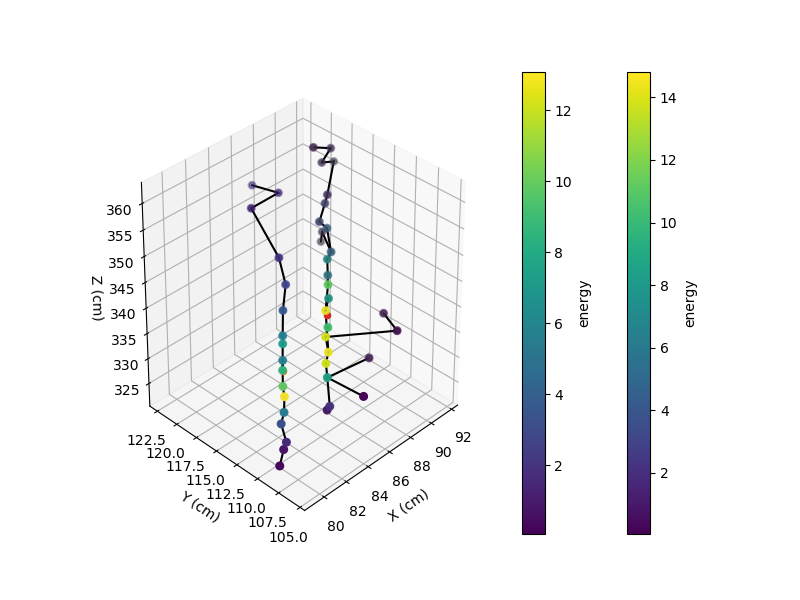

Event=435
Raw_Energy=[76.1, 115, 3.12]
Regressed_Energy=[80.4, 125, 4.47]
Number of nodes=[9, 28, 15]


<IPython.core.display.Javascript object>


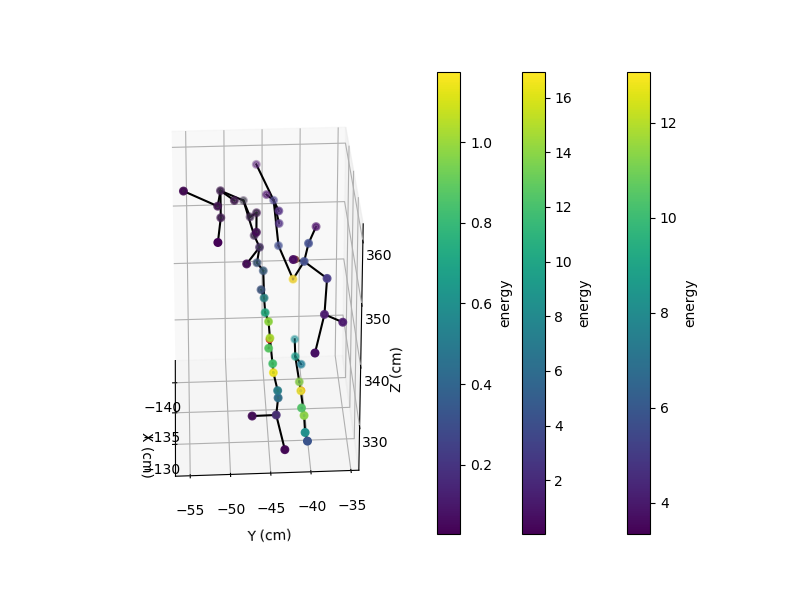

In [9]:
N=5
randomEvents=np.random.randint(0,450,N)

%matplotlib notebook
plt.style.use("default")

for i in randomEvents:
    #fig = plt.figure(figsize=(8,6))
    #ax = fig.add_subplot(111, projection='3d')
    plotEvent(trackstersE100D3,i,"energy")


Event=48
Raw_Energy=[39.8, 51.3]
Regressed_Energy=[39, 67.7]
Number of nodes=[9, 21]


<IPython.core.display.Javascript object>


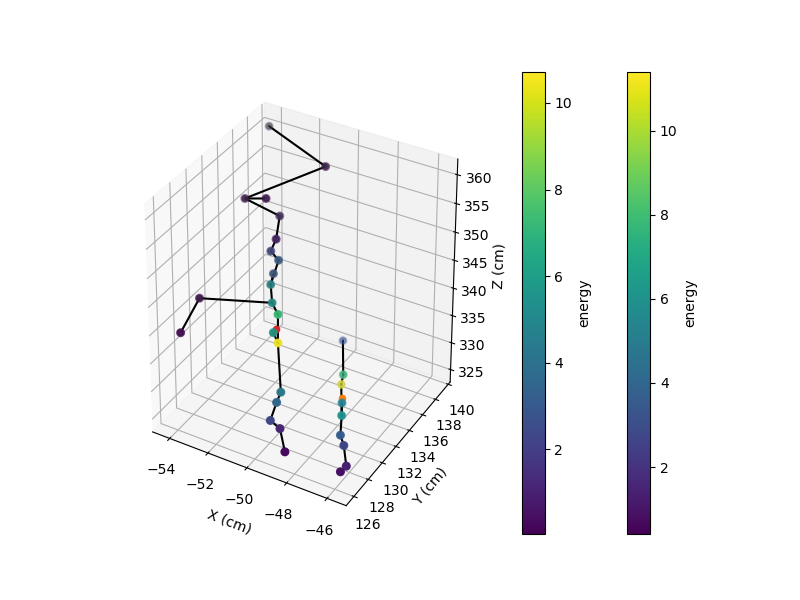

Event=72
Raw_Energy=[38.8, 53.3]
Regressed_Energy=[42.3, 65]
Number of nodes=[10, 26]


<IPython.core.display.Javascript object>


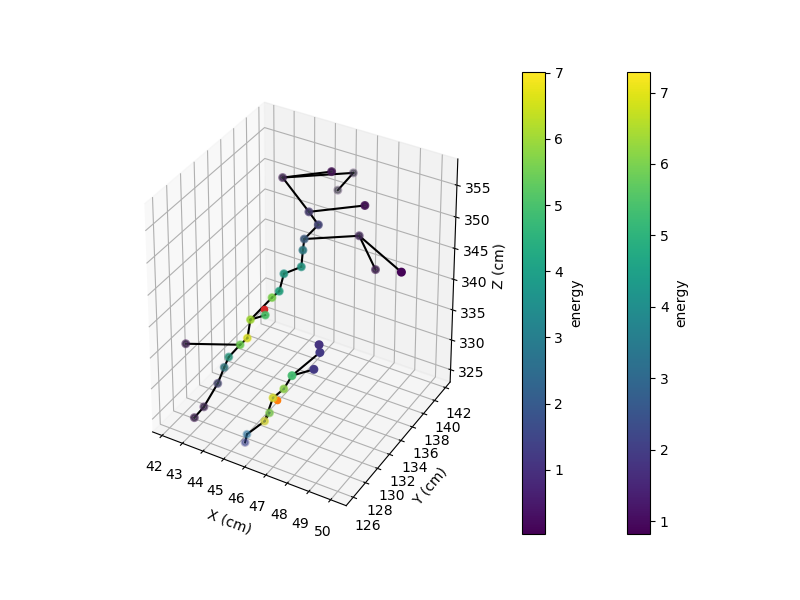

Event=226
Raw_Energy=[48.2, 45.8]
Regressed_Energy=[57.9, 54.6]
Number of nodes=[27, 23]


<IPython.core.display.Javascript object>


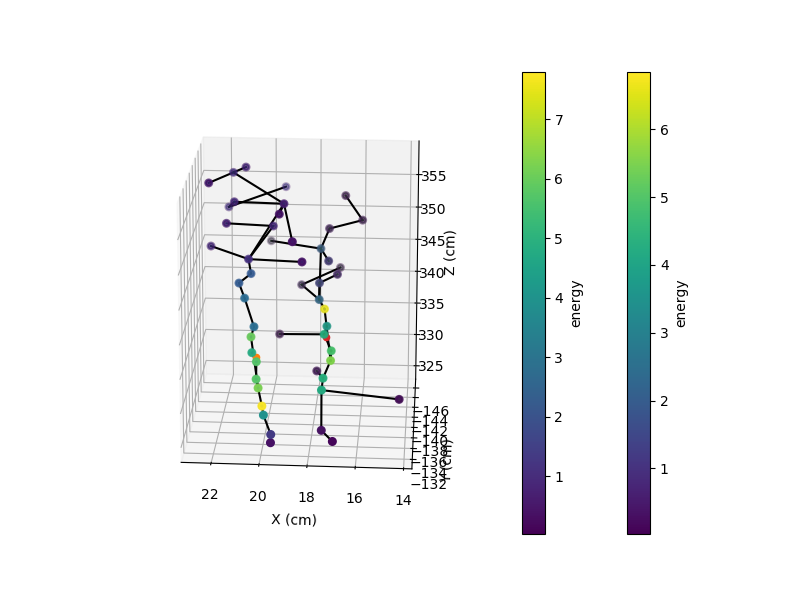

Event=275
Raw_Energy=[13.9, 49.7, 22.2, 1.33]
Regressed_Energy=[23.1, 50.2, 21.1, 4.67]
Number of nodes=[6, 13, 20, 5]


<IPython.core.display.Javascript object>


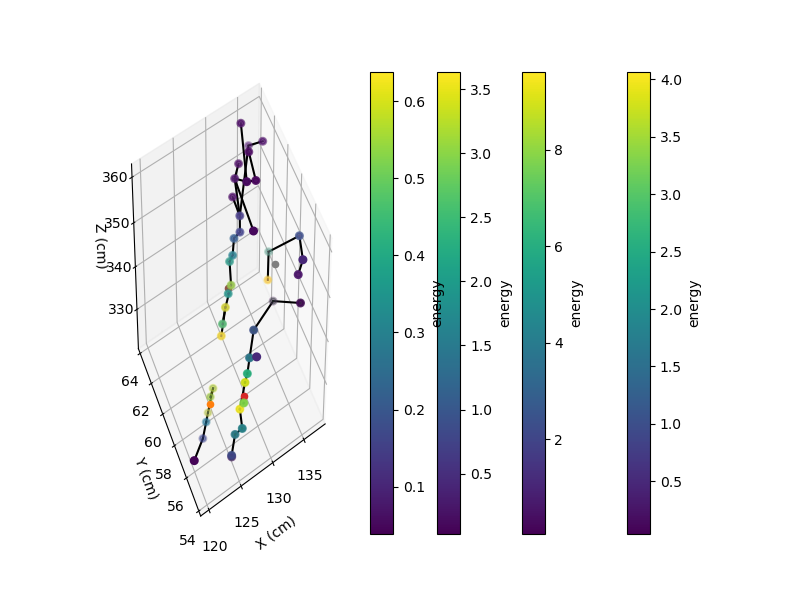

Event=38
Raw_Energy=[45.8, 43.2]
Regressed_Energy=[55.3, 48.9]
Number of nodes=[21, 20]


<IPython.core.display.Javascript object>


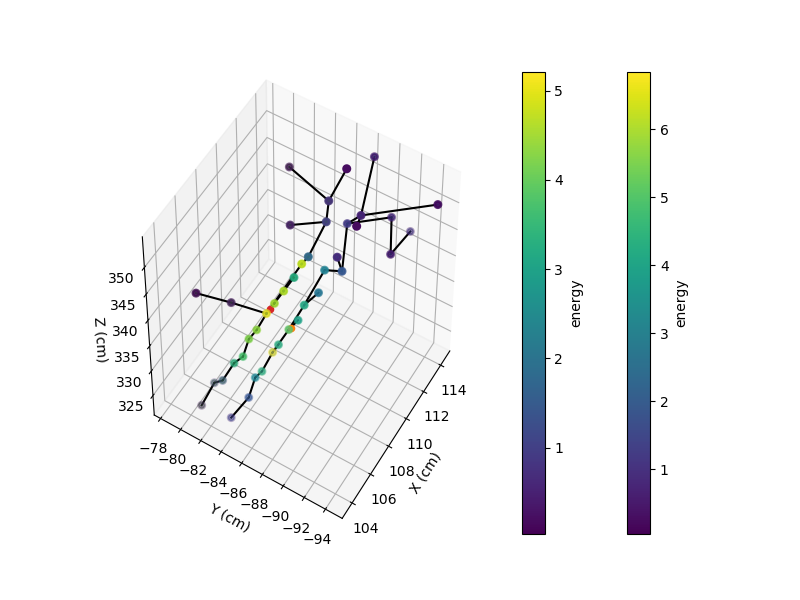

In [10]:
N=5
randomEvents=np.random.randint(0,450,N)

%matplotlib notebook
plt.style.use("default")

for i in randomEvents:
    #fig = plt.figure(figsize=(8,6))
    #ax = fig.add_subplot(111, projection='3d')
    plotEvent(trackstersE50D3,i,"energy")


In [ ]:
N=10
randomEvents=np.random.randint(0,450,N)

%matplotlib inline
plt.style.use("default")
tracks=trackstersD5
fig = plt.figure(figsize=(8,6))
for nEvent in randomEvents:
    
    indexes = tracks['vertices_indexes'].array()[nEvent]
    x = tracks['vertices_x'].array()[nEvent]
    y = tracks['vertices_y'].array()[nEvent]
    z = tracks['vertices_z'].array()[nEvent]
    E = tracks['vertices_energy'].array()[nEvent]
    NTracks=len(x)
    print(f"Event={nEvent}")
    print(f"Energy={ak.sum(E,axis=1)}")
    print(f"Number of nodes={ak.count(indexes,axis=1)}")
    
    for i in range(NTracks):
        plt.scatter(x[i]-x[i][0],y[i]-y[i][0])

plt.show()

N=10
randomEvents=np.random.randint(0,450,N)

%matplotlib inline
plt.style.use("default")
tracks=trackstersE50D2
fig = plt.figure(figsize=(8,6))
for nEvent in randomEvents:
    
    indexes = tracks['vertices_indexes'].array()[nEvent]
    x = tracks['vertices_x'].array()[nEvent]
    y = tracks['vertices_y'].array()[nEvent]
    z = tracks['vertices_z'].array()[nEvent]
    E = tracks['vertices_energy'].array()[nEvent]
    NTracks=len(x)
    #print(f"Event={nEvent}")
    #print(f"Energy={ak.sum(E,axis=1)}")
    #print(f"Number of nodes={ak.count(indexes,axis=1)}")
    
    for i in range(NTracks):
        #print(z,E)
        plt.scatter(x[i]-x[i][0],y[i]-y[i][0])


plt.show()

In [ ]:
N=10
randomEvents=np.random.randint(0,450,N)

%matplotlib inline
plt.style.use("default")
tracks=trackstersE50D2
fig = plt.figure(figsize=(8,6))
for nEvent in randomEvents:
    
    indexes = tracks['vertices_indexes'].array()[nEvent]
    x = tracks['vertices_x'].array()[nEvent]
    y = tracks['vertices_y'].array()[nEvent]
    z = tracks['vertices_z'].array()[nEvent]
    E = tracks['vertices_energy'].array()[nEvent]
    NTracks=len(x)
    print(f"Event={nEvent}")
    print(f"Energy={ak.sum(E,axis=1)}")
    print(f"Number of nodes={ak.count(indexes,axis=1)}")
    
    for i in range(NTracks):
        #print(z,E)
        plt.scatter(z[i],E[i])


plt.show()

In [21]:
def plotHits(tracksters,nEvent):
    indexes = tracksters['vertices_indexes'].array()[nEvent]
    x = tracksters['recHits_x'].array()[nEvent]
    y = tracksters['recHits_y'].array()[nEvent]
    z = tracksters['recHits_z'].array()[nEvent]
    E = tracksters['vertices_energy'].array()[nEvent]
    NTracks=len(x)
    print(f"Event={nEvent}")
    print(f"Energy={ak.sum(E,axis=1)}")
    print(f"Number of nodes={ak.count(indexes,axis=1)}")
    
    for i in range(NTracks):
        fig = plt.figure(figsize=(8,6))
        ax = fig.add_subplot(111, projection='3d')
    
        yg =ax.scatter(x[i], y[i], z[i], marker='o') 
        ax.set_xlabel('X (cm)')
        ax.set_ylabel('Y (cm)')
        ax.set_zlabel('Z (cm)')
        
        plt.show()


Event=28
Energy=[94.5, 93.9]
Number of nodes=[32, 23]


<IPython.core.display.Javascript object>


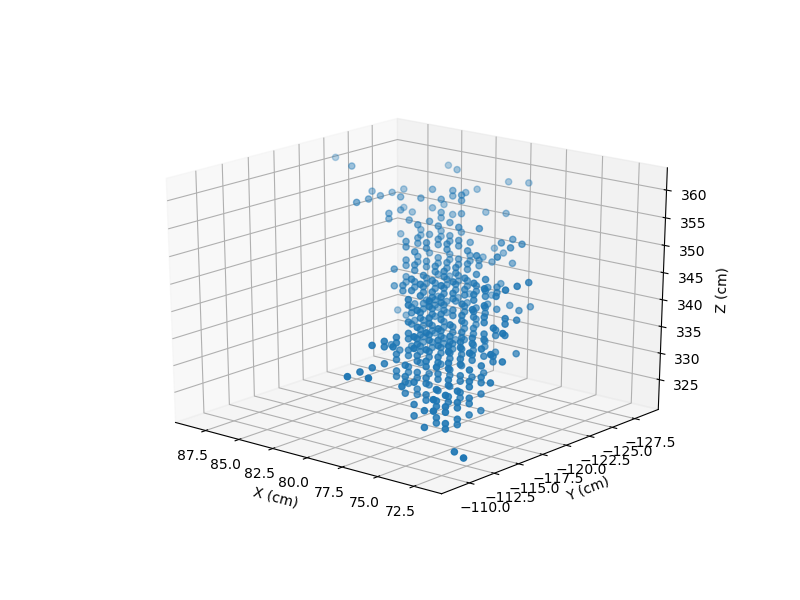

<IPython.core.display.Javascript object>


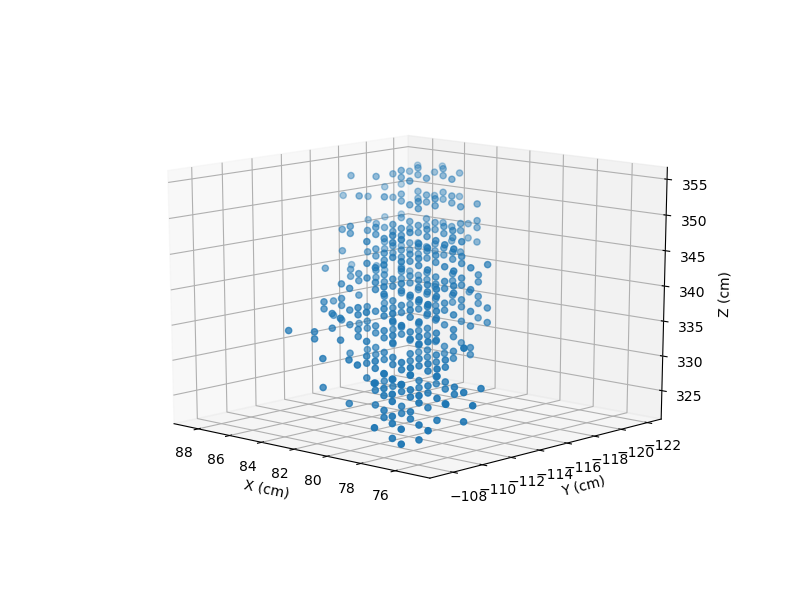

Event=25
Energy=[94.7, 93.9, 1.2]
Number of nodes=[27, 22, 3]


<IPython.core.display.Javascript object>


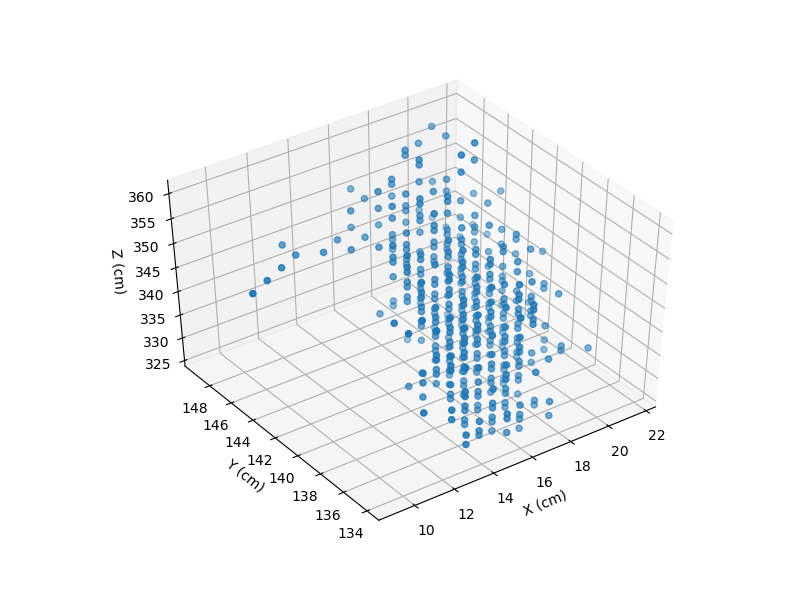

<IPython.core.display.Javascript object>


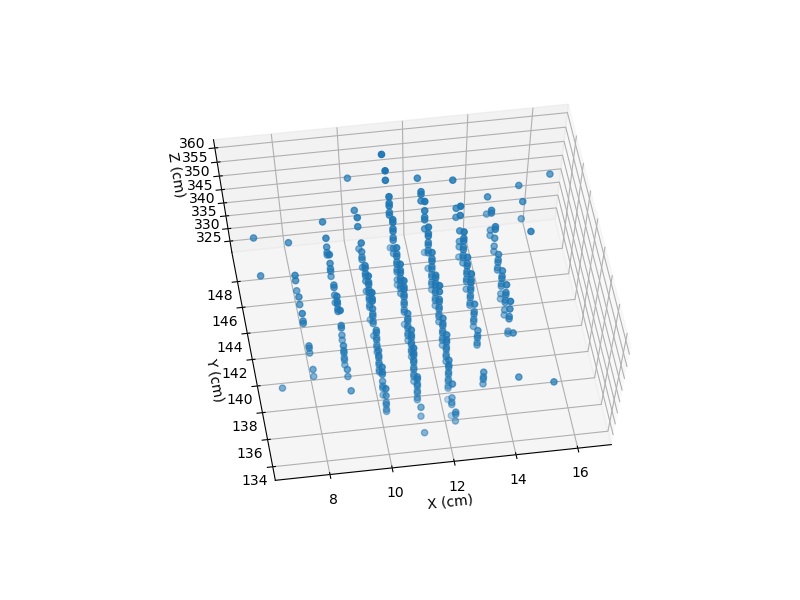

<IPython.core.display.Javascript object>


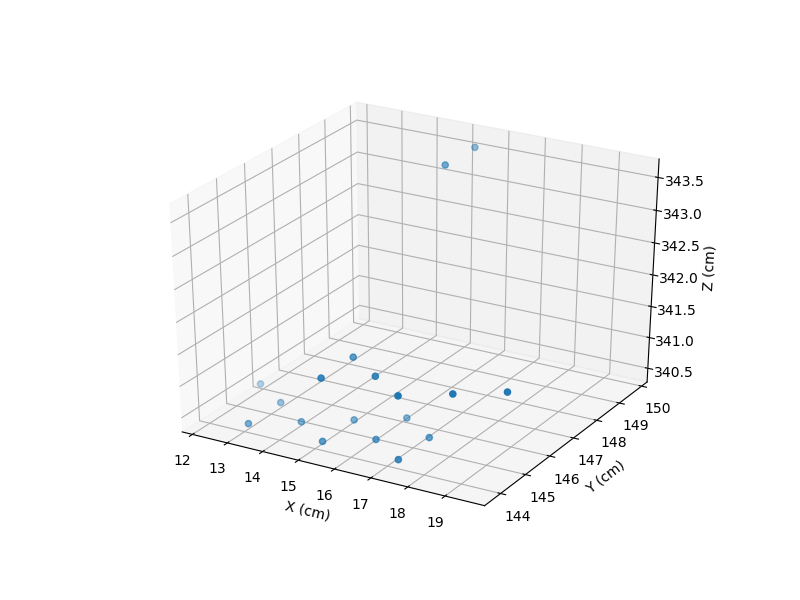

Event=151
Energy=[91.6, 93.4, 1.09]
Number of nodes=[29, 22, 2]


<IPython.core.display.Javascript object>


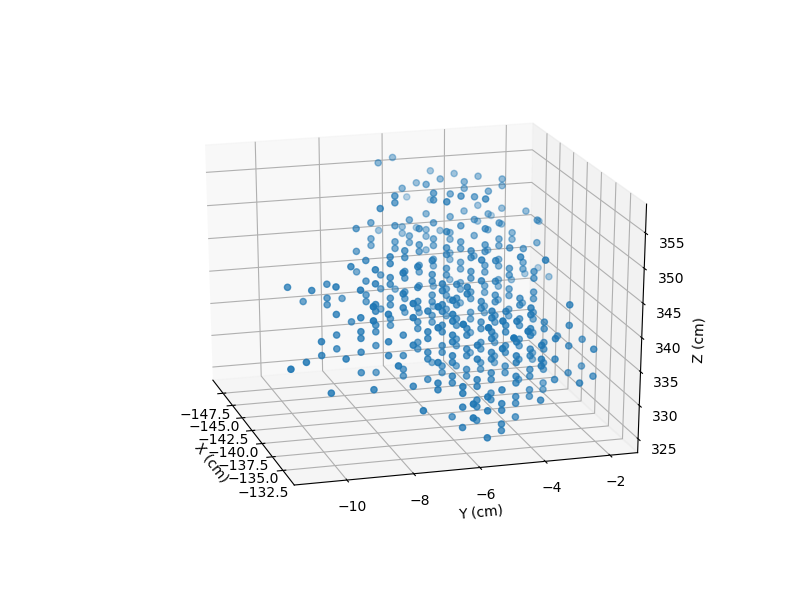

<IPython.core.display.Javascript object>


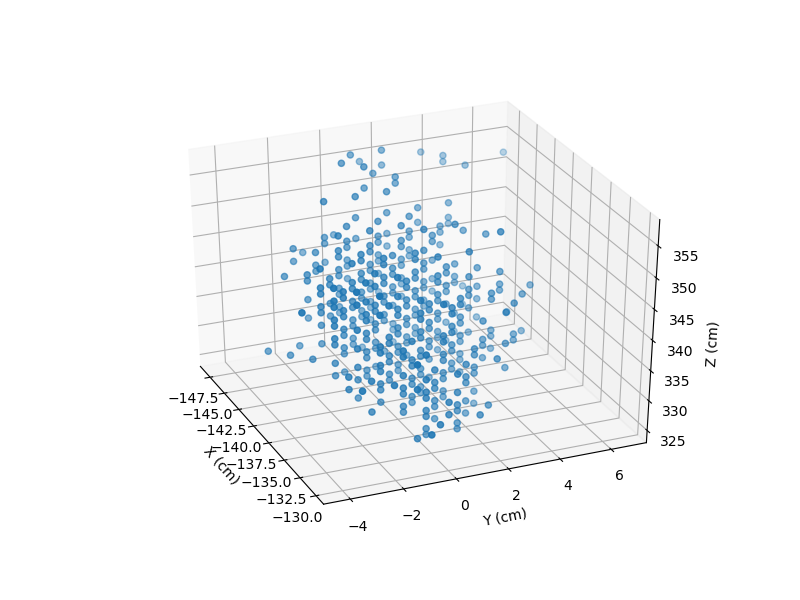

<IPython.core.display.Javascript object>


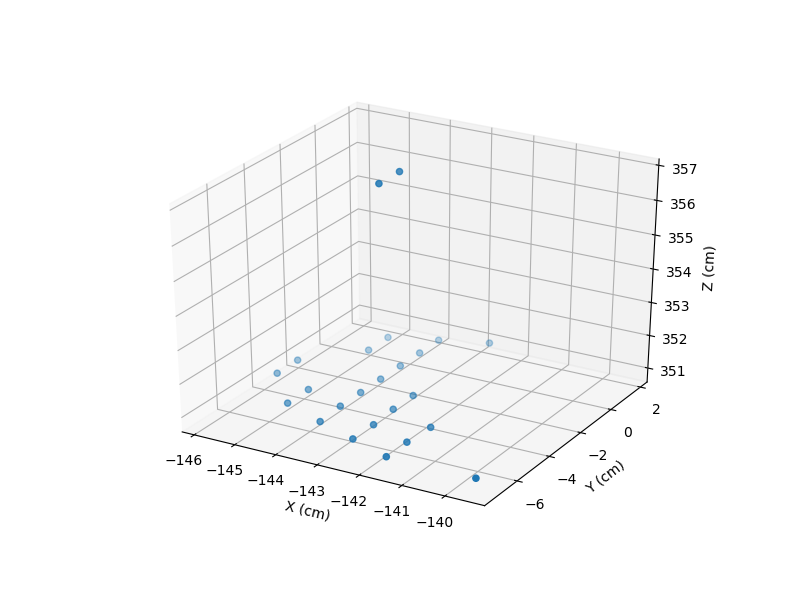

Event=82
Energy=[93.1, 96.6]
Number of nodes=[23, 24]


<IPython.core.display.Javascript object>


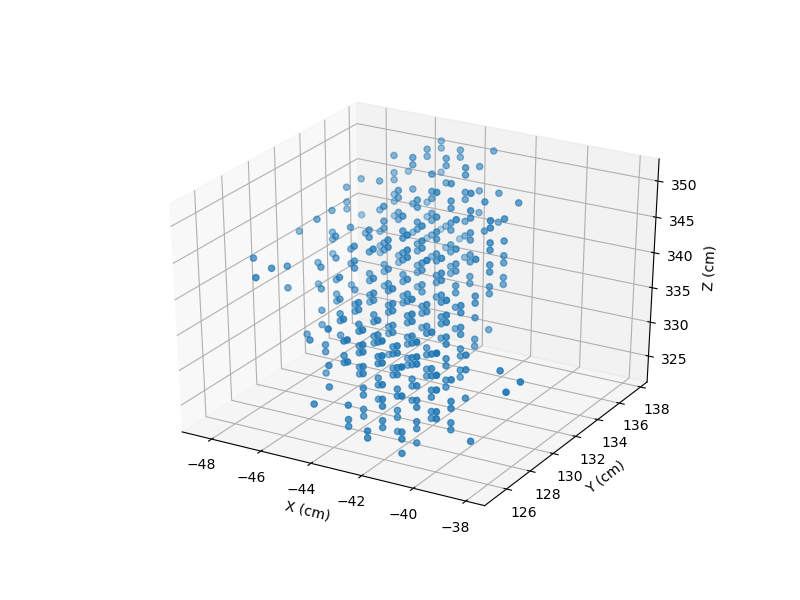

<IPython.core.display.Javascript object>


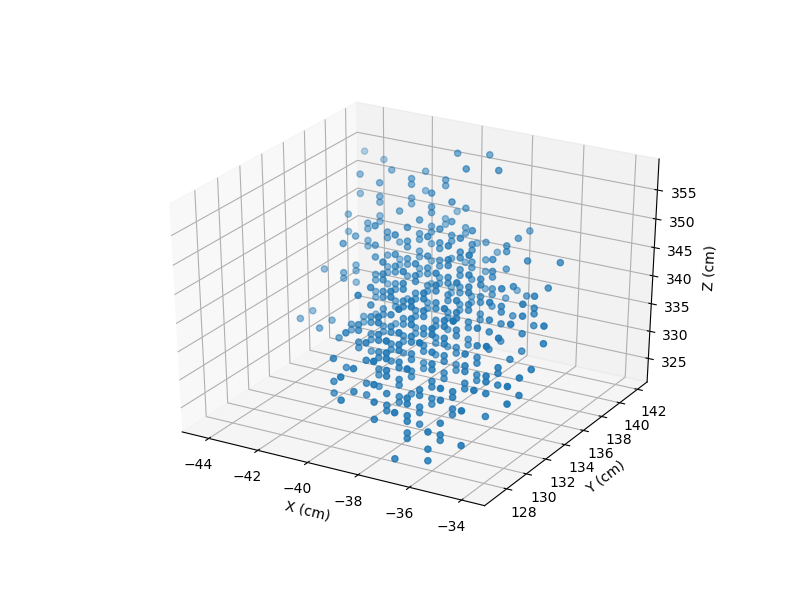

Event=204
Energy=[89, 93.6]
Number of nodes=[34, 25]


<IPython.core.display.Javascript object>


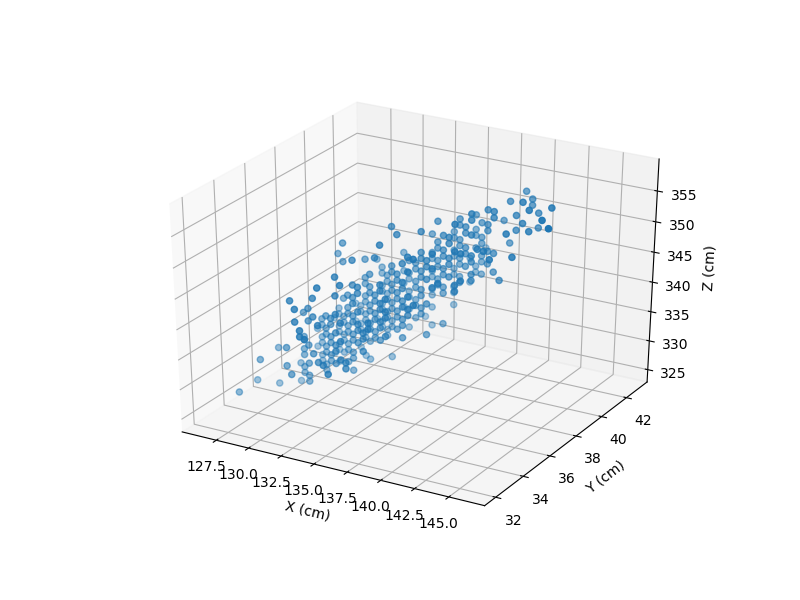

<IPython.core.display.Javascript object>


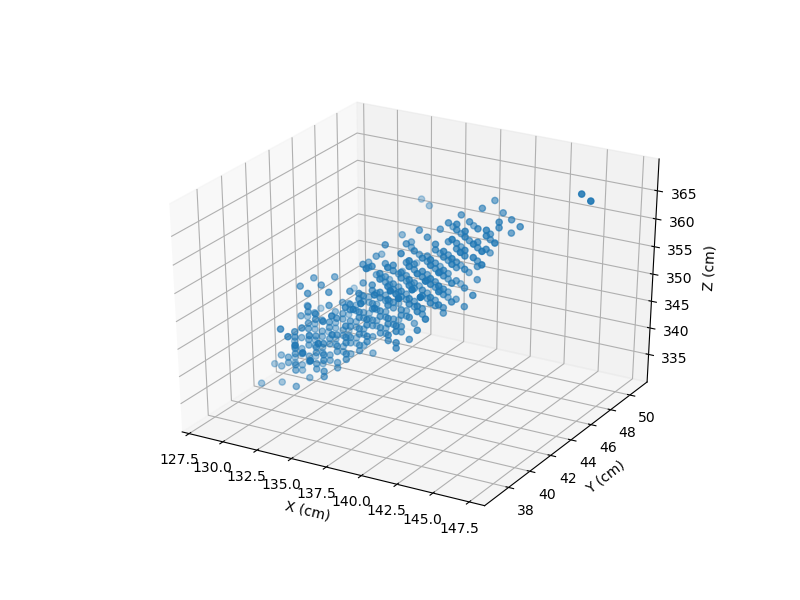

In [24]:
N=5
randomEvents=np.random.randint(0,450,N)

%matplotlib notebook
plt.style.use("default")

for i in randomEvents:
    
    plotHits(trackstersD5,i)


Event=115
Energy=[88]
Number of nodes=[24]


<IPython.core.display.Javascript object>


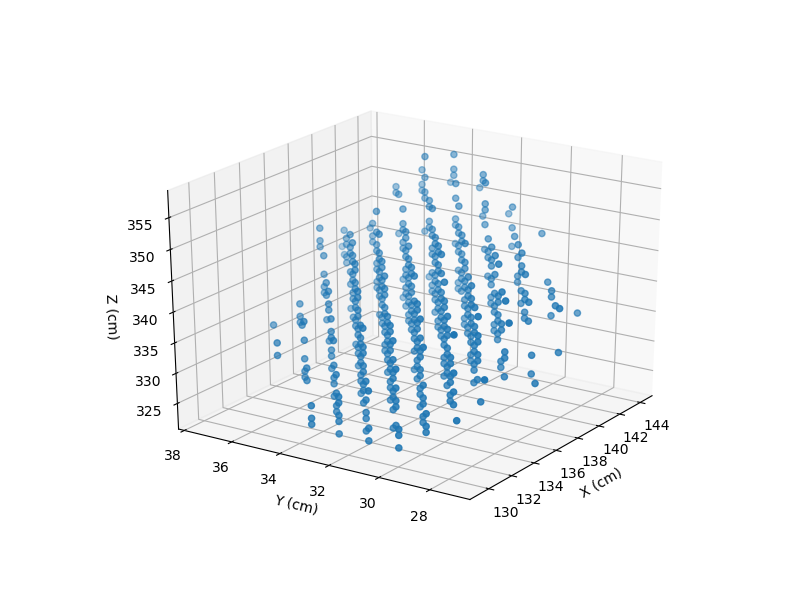

Event=207
Energy=[93.6]
Number of nodes=[37]


<IPython.core.display.Javascript object>


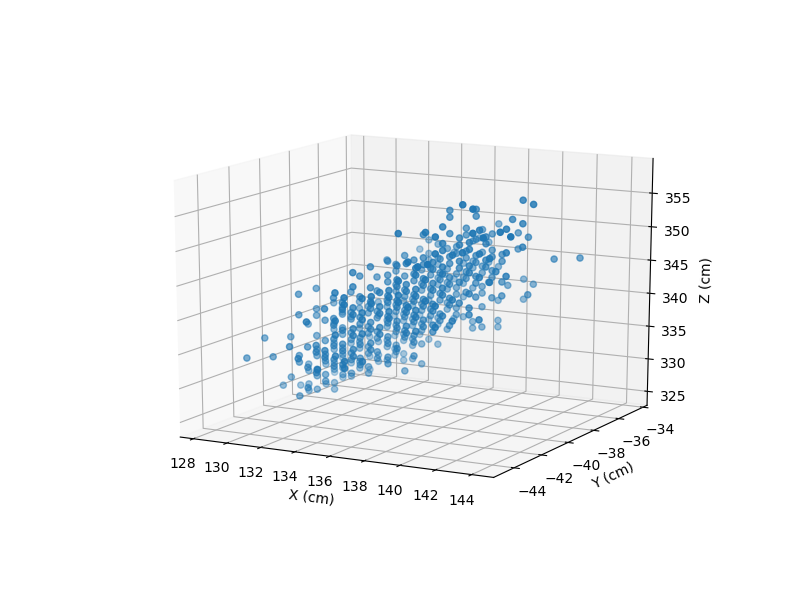

Event=63
Energy=[27.5, 61.3, 2.1]
Number of nodes=[5, 28, 8]


<IPython.core.display.Javascript object>


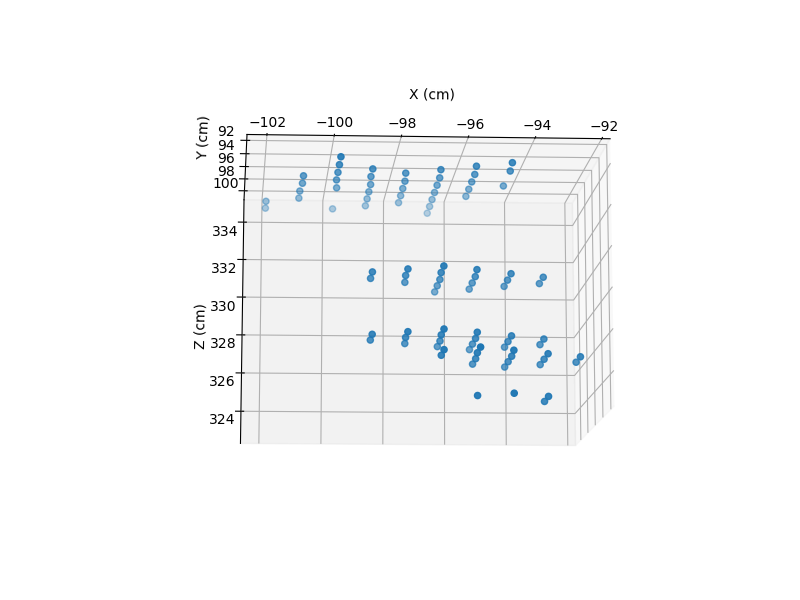

<IPython.core.display.Javascript object>


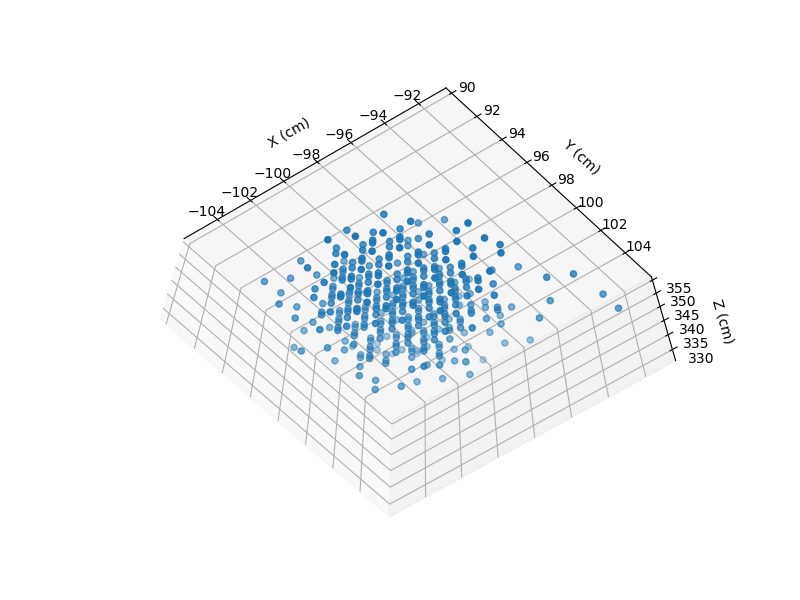

<IPython.core.display.Javascript object>


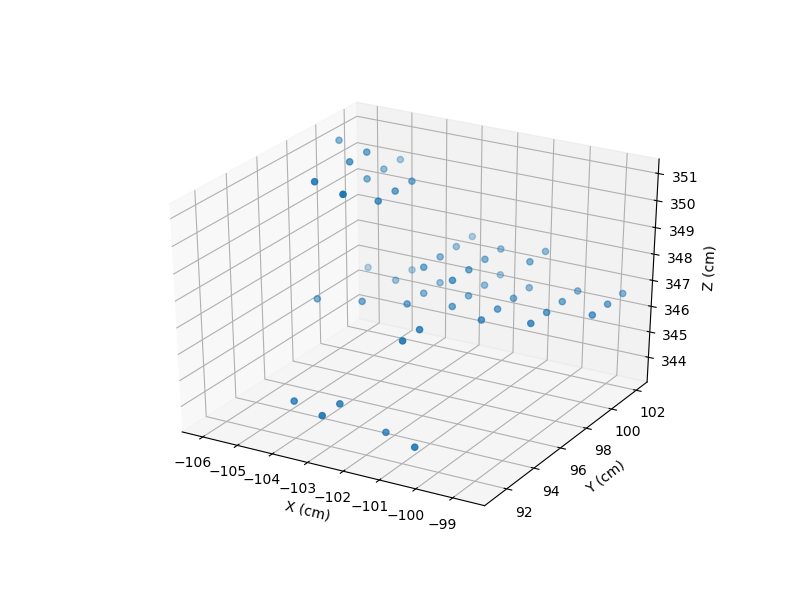

Event=375
Energy=[92.1]
Number of nodes=[27]


<IPython.core.display.Javascript object>


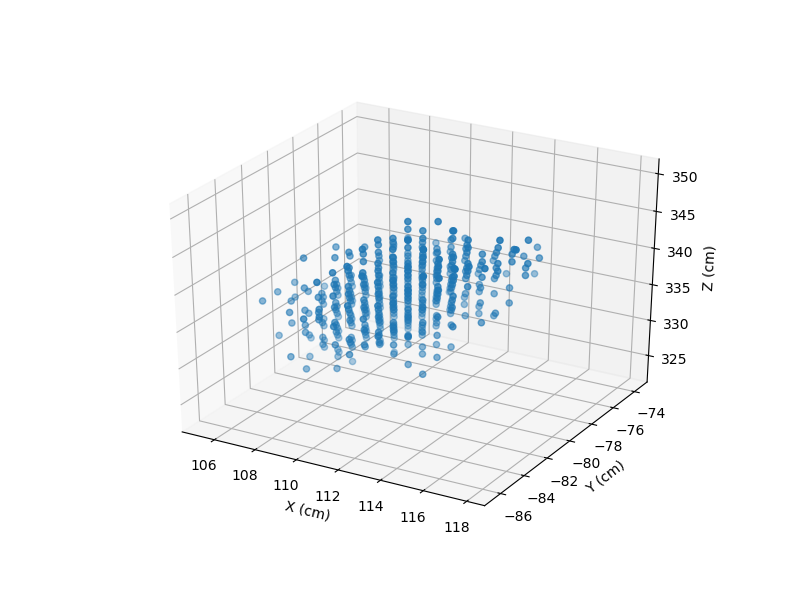

Event=82
Energy=[92.2]
Number of nodes=[27]


<IPython.core.display.Javascript object>


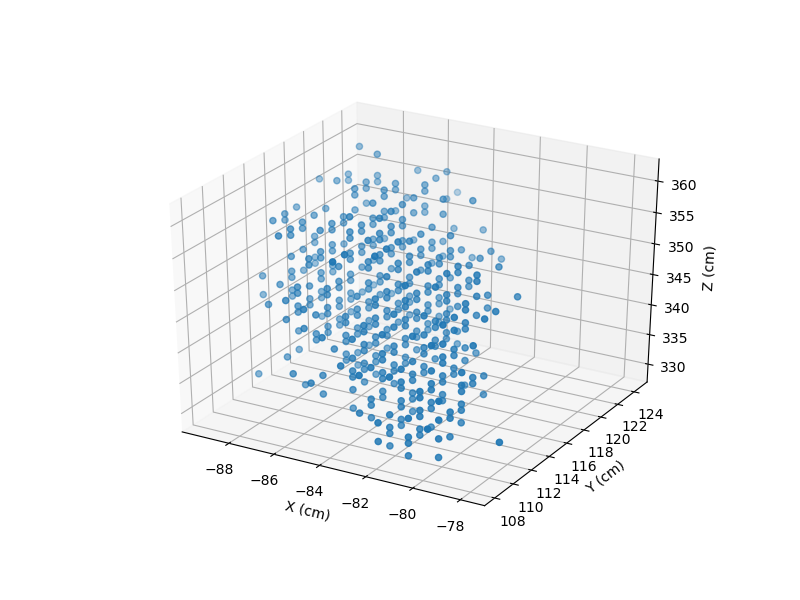

In [23]:
N=5
randomEvents=np.random.randint(0,450,N)

%matplotlib notebook
plt.style.use("default")

for i in randomEvents:
    
    plotHits(trackstersE50D2,i)


In [14]:
def plotEvent(tracksters,nEvent,heatmap="energy",nEdg=1):
    indexes = tracksters['vertices_indexes'].array()[nEvent]
    x = tracksters['vertices_x'].array()[nEvent]
    y = tracksters['vertices_y'].array()[nEvent]
    z = tracksters['vertices_z'].array()[nEvent]
    E = tracksters['vertices_energy'].array()[nEvent]
    NTracks=len(x)
    print(f"Event={nEvent}")
    print(f"Raw_Energy={ak.sum(E,axis=1)}")
    reg_energy=tracksters["regressed_energy"].array()[nEvent]
    print(f"Regressed_Energy={reg_energy}")
    print(f"Number of nodes={ak.count(indexes,axis=1)}")
    
    for i in range(NTracks):
        fig = plt.figure(figsize=(8,6))
        ax = fig.add_subplot(111, projection='3d')
        edges_1 = fn.edgeBuilderNew(indexes[i],x[i],y[i],z[i],E[i],nEdg)
        edges_1 = ak.flatten(edges_1[ak.num(edges_1) > 0].to_list())
        if(heatmap=="centrality"):
            heatmapVals=fn.nXCentralityPageRank(indexes[i],edges_1,True)
        elif(heatmap=="energy"):
            heatmapVals=E[i]
        yg =ax.scatter(x[i], y[i], z[i], marker='o') 
        ax.set_xlabel('X (cm)')
        ax.set_ylabel('Y (cm)')
        ax.set_zlabel('Z (cm)')
        colmap = cm.ScalarMappable(cmap=cm.viridis)
        if len(heatmapVals) > 0 :
            colmap.set_array(heatmapVals)
            yg = ax.scatter(x[i], y[i], z[i], c=cm.viridis(heatmapVals/max(heatmapVals)), marker='o', linewidth=2)
            cb = fig.colorbar(colmap,label=heatmap)
        else:
            yg =ax.scatter(x, y, z, marker='o') 

        if len(heatmap) > 0:
            
            for ind in edges_1:
                idx0 = ak.where(indexes[i] == ind.to_list()[0])[0][0]
                idx1 = ak.where(indexes[i] == ind.to_list()[1])[0][0]
                ax.plot(
                    [x[i][idx0] ,x[i][idx1]],
                    [y[i][idx0] ,y[i][idx1]],
                    [z[i][idx0] ,z[i][idx1]],
                    'black'
                )
        Eta=tracksters['trackster_barycenter_eta'].array()[nEvent][i]
        Phi=tracksters['trackster_barycenter_phi'].array()[nEvent][i]
        
        #ax.scatter(tracksters['barycenter_x'].array()[nEvent][i],
        #        tracksters['barycenter_y'].array()[nEvent][i],
        #        tracksters['barycenter_z'].array()[nEvent][i],
        #       'black')
        plt.savefig("/eos/user/d/dmagdali/figures/"+f"Event{nEvent}_E100D5_nEdg{nEdg}_N{i}_Energy"+"{:.2f}.png".format(ak.sum(E,axis=1)[i]))
        #plt.show()

Event=35
Raw_Energy=[94.3, 92.3, 1.8]
Regressed_Energy=[108, 101, 5.88]
Number of nodes=[28, 36, 2]


<IPython.core.display.Javascript object>


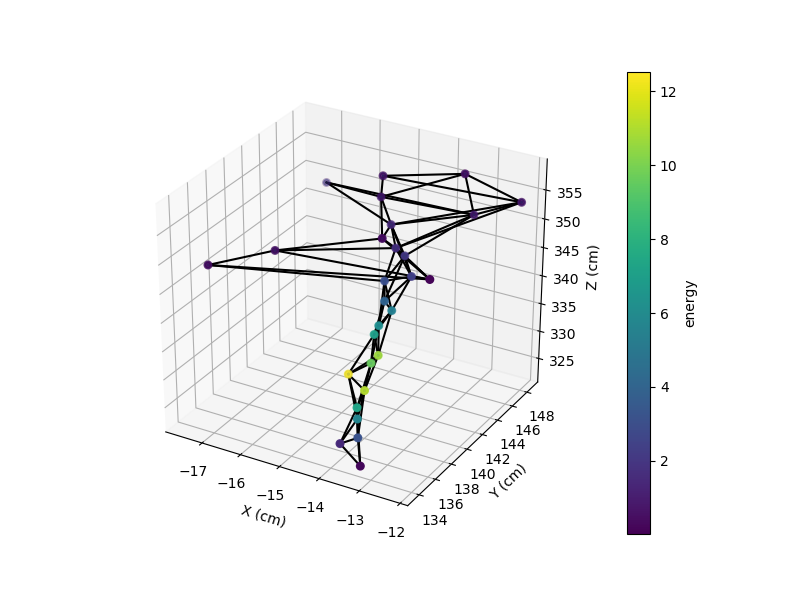

<IPython.core.display.Javascript object>


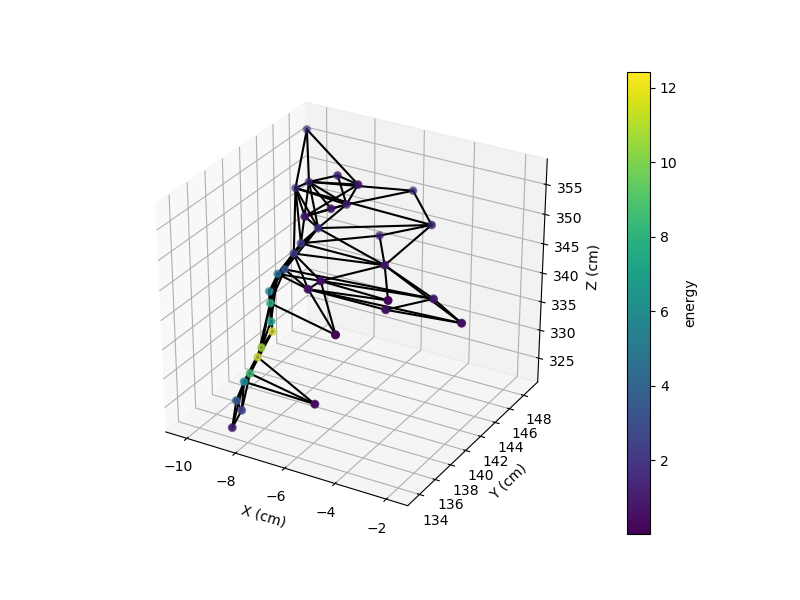

<IPython.core.display.Javascript object>


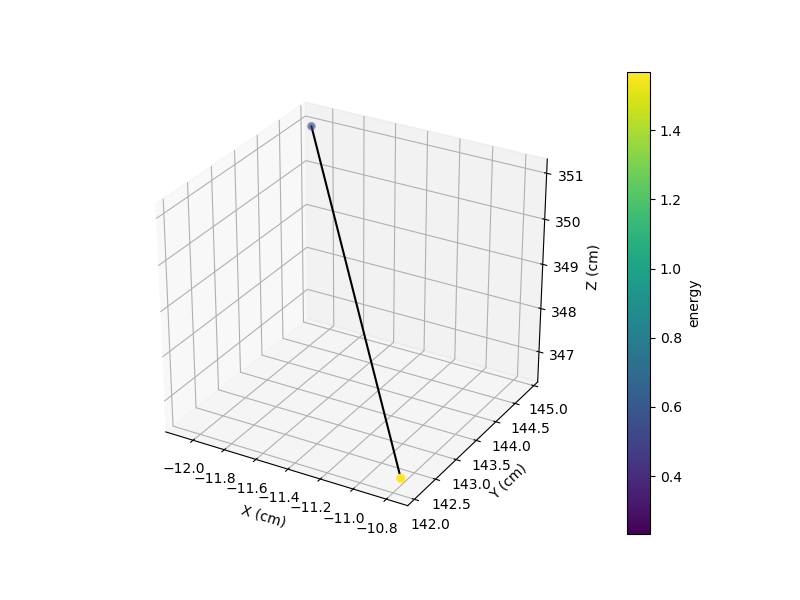

In [15]:
%matplotlib notebook
plt.style.use("default")
i=35

plotEvent(trackstersE100D5,i,"energy",3)